
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024 <br>
<font color=3C99D size=5>
    Practical Assignment 1 - Supervised Learning <br>

# Personal Data

In [49]:
student_number = '401104479'
Name = 'Mohammad Mahdi'
Last_Name = 'Montazeri Hedesh'

# Libraries

In [50]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

from scipy.stats import chi2

# Polynomial Regression & Bias-Variance Tradeoff (100 Points)

## Introduction
In this part, we will explore the **bias-variance tradeoff** using polynomial regression models. Polynomial regression allows us to model complex relationships between an independent variable $X$ and a dependent variable $y$ by introducing higher-degree polynomial terms. However, increasing the complexity of the model can lead to **overfitting** or **underfitting**, which are key concepts in the bias-variance tradeoff.

## Plan
1. **Create a synthetic dataset**: Use the provided quadratic function to generate $X$ and $y$ with noise.
2. **Split the dataset**: Divide the data into training and test sets to evaluate model generalization.
3. **Train polynomial models**: Fit polynomial regression models with degrees ranging from 1 to 10 (or more).
4. **Evaluate performance**: Calculate the MSE for both training and test sets and compare the errors for different polynomial degrees.
5. **Analyze the results**: Use plots to visualize how the error on the training and test sets changes as the model complexity increases.

## Objective
The objective is to determine the degree of the polynomial that best models the relationship between $X$ and $y$ and balances both underfitting and overfitting, i.e., the degree that achieves the best generalization.

## 1. Create a synthetic dataset (15 Points)

Your first task is to define a function that generates a dataset with 1000 samples. The input values for the independent variable $X$ should be randomly selected within the range of **-3 to 3**. To make the dataset more realistic, add noise to the output using a normal distribution with a mean of 0 and a standard deviation of 10.

The relationship between the independent variable $X$ and the dependent variable $y$ is modeled by the following equation:

$$
y = 0.2X^6 - 0.5X^5 + 2X^4 - 5X^3 + 3X^2 - 10X + 5 + \text{noise}
$$

In [51]:
def generate_dataset(range_start, range_end, num_samples=1000, noise_std=10.0):
    X = np.random.uniform(range_start, range_end, num_samples)

    y = (0.2 * X**6 - 0.5 * X**5 + 2 * X**4 - 5 * X**3 + 3 * X**2 - 10 * X + 5)

    noise = np.random.normal(0, noise_std, num_samples)
    y += noise
    return X, y

Use a scatter plot to visualize the relationship between $X$ and $y$. This will help you understand the structure of the generated data before moving on to fitting models.

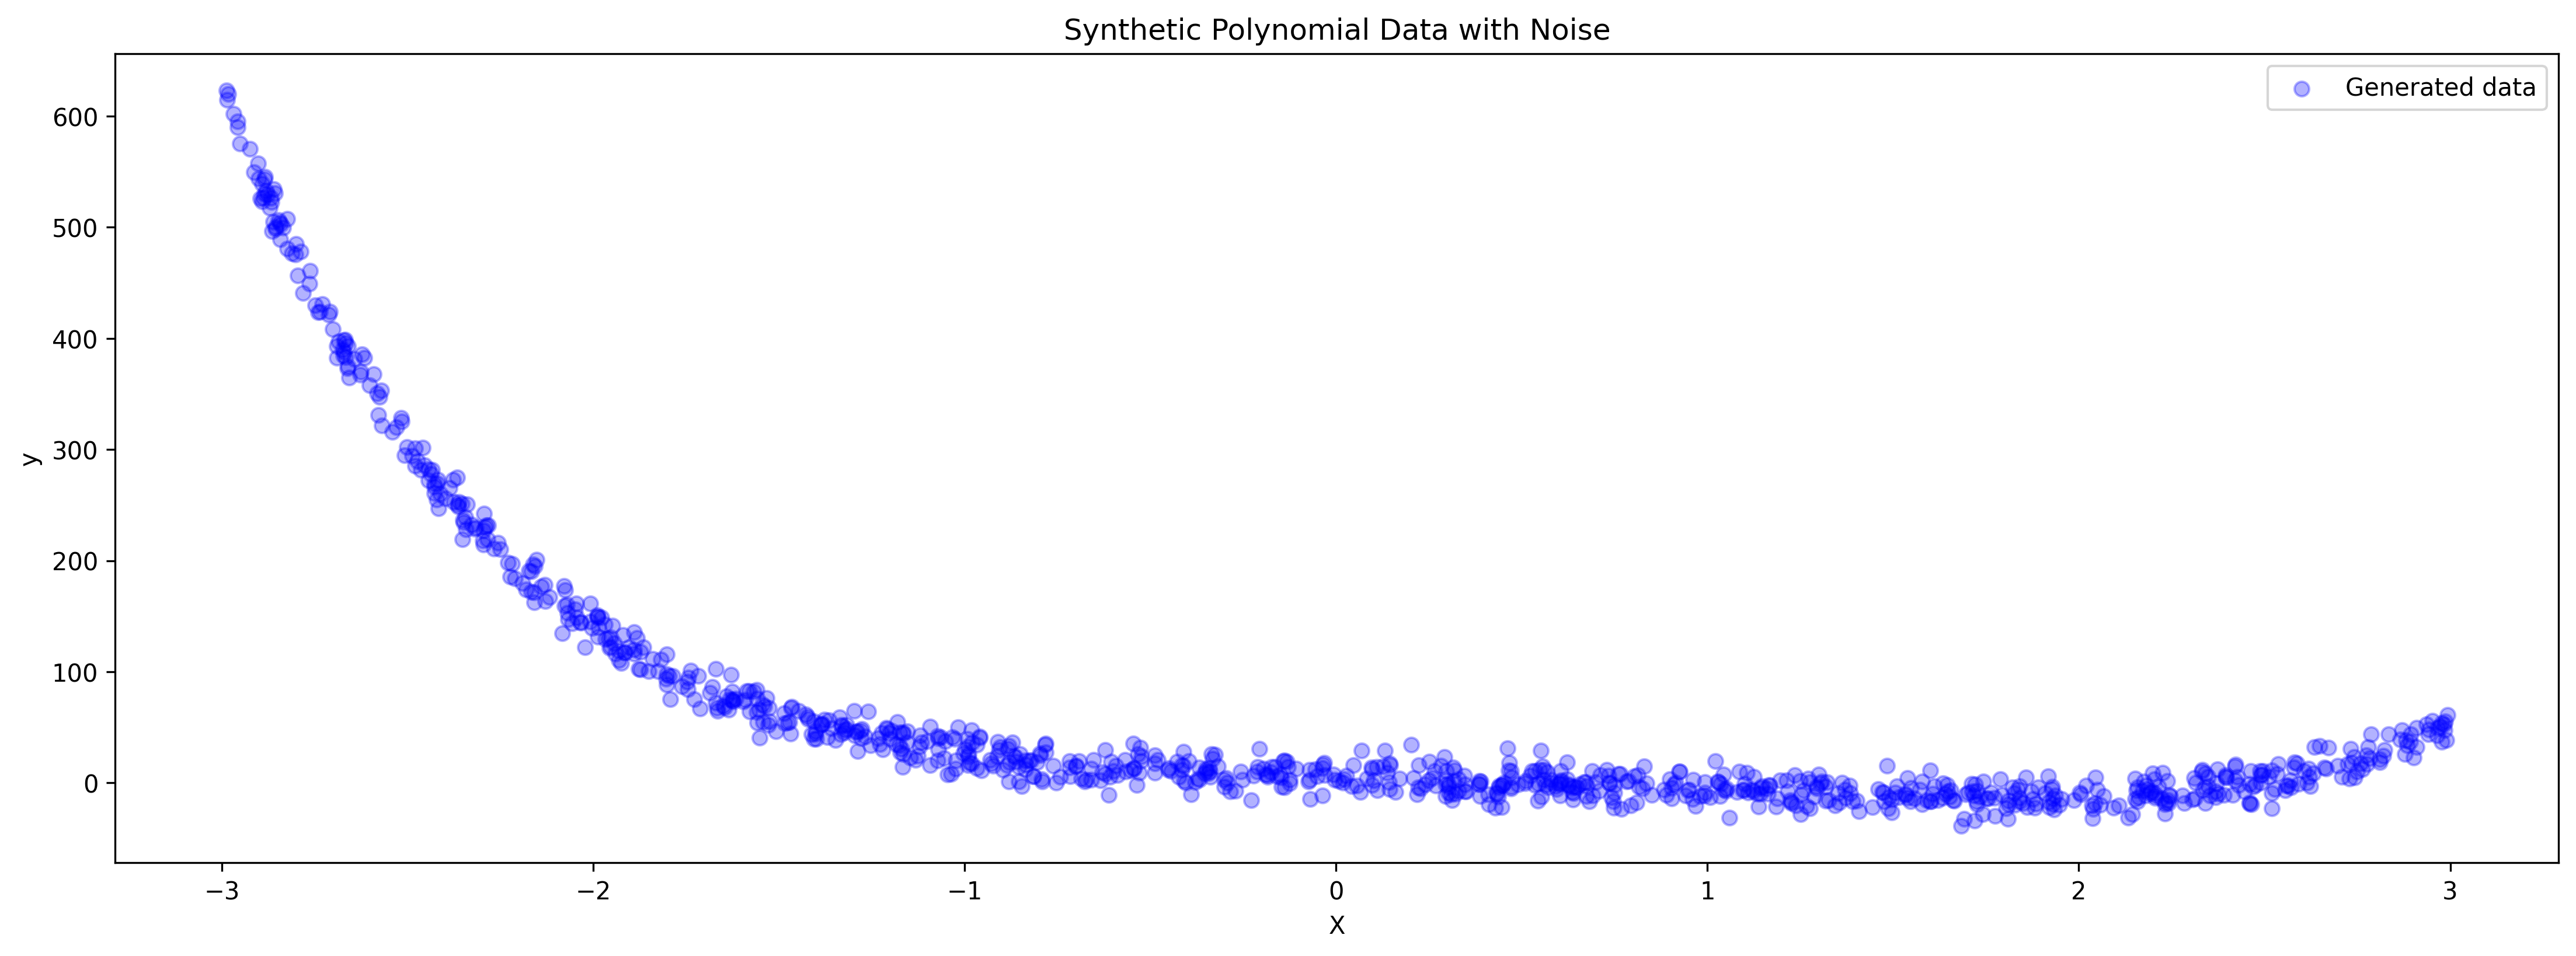

In [52]:
X, y = generate_dataset(-3, 3)

plt.figure(figsize=(18, 6) , dpi = 300)
plt.scatter(X, y, color='blue', alpha=0.3, label='Generated data')

plt.title('Synthetic Polynomial Data with Noise')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.show()

## 2. Splitting the Dataset (5 Points)

In this task, you should split the dataset into three parts:
1. **Training Set**
2. **In-Range Test Set**: This set should contain data within the same range as the training set.
3. **Out-of-Range Test Set**: This set should contain data in the range **[5, 7]**.

Ensure that the two test sets (In-Range and Out-of-Range) have the same length. You can use the `train_test_split` function from the `sklearn` library for convenience in splitting the data.

In [53]:
X_train, X_test_in_range, y_train, y_test_in_range = train_test_split(X, y, test_size=0.2, random_state=42)

X_out_of_range, y_out_of_range = generate_dataset(5, 7, num_samples=len(X_test_in_range))

print("Training set size:", X_train.shape)
print("In-range test set size:", X_test_in_range.shape)
print("Out-of-range test set size:", X_out_of_range.shape)

Training set size: (800,)
In-range test set size: (200,)
Out-of-range test set size: (200,)


Again, you can use a scatter plot (or similar plots) to visualize the different sets and see their overall distributions.

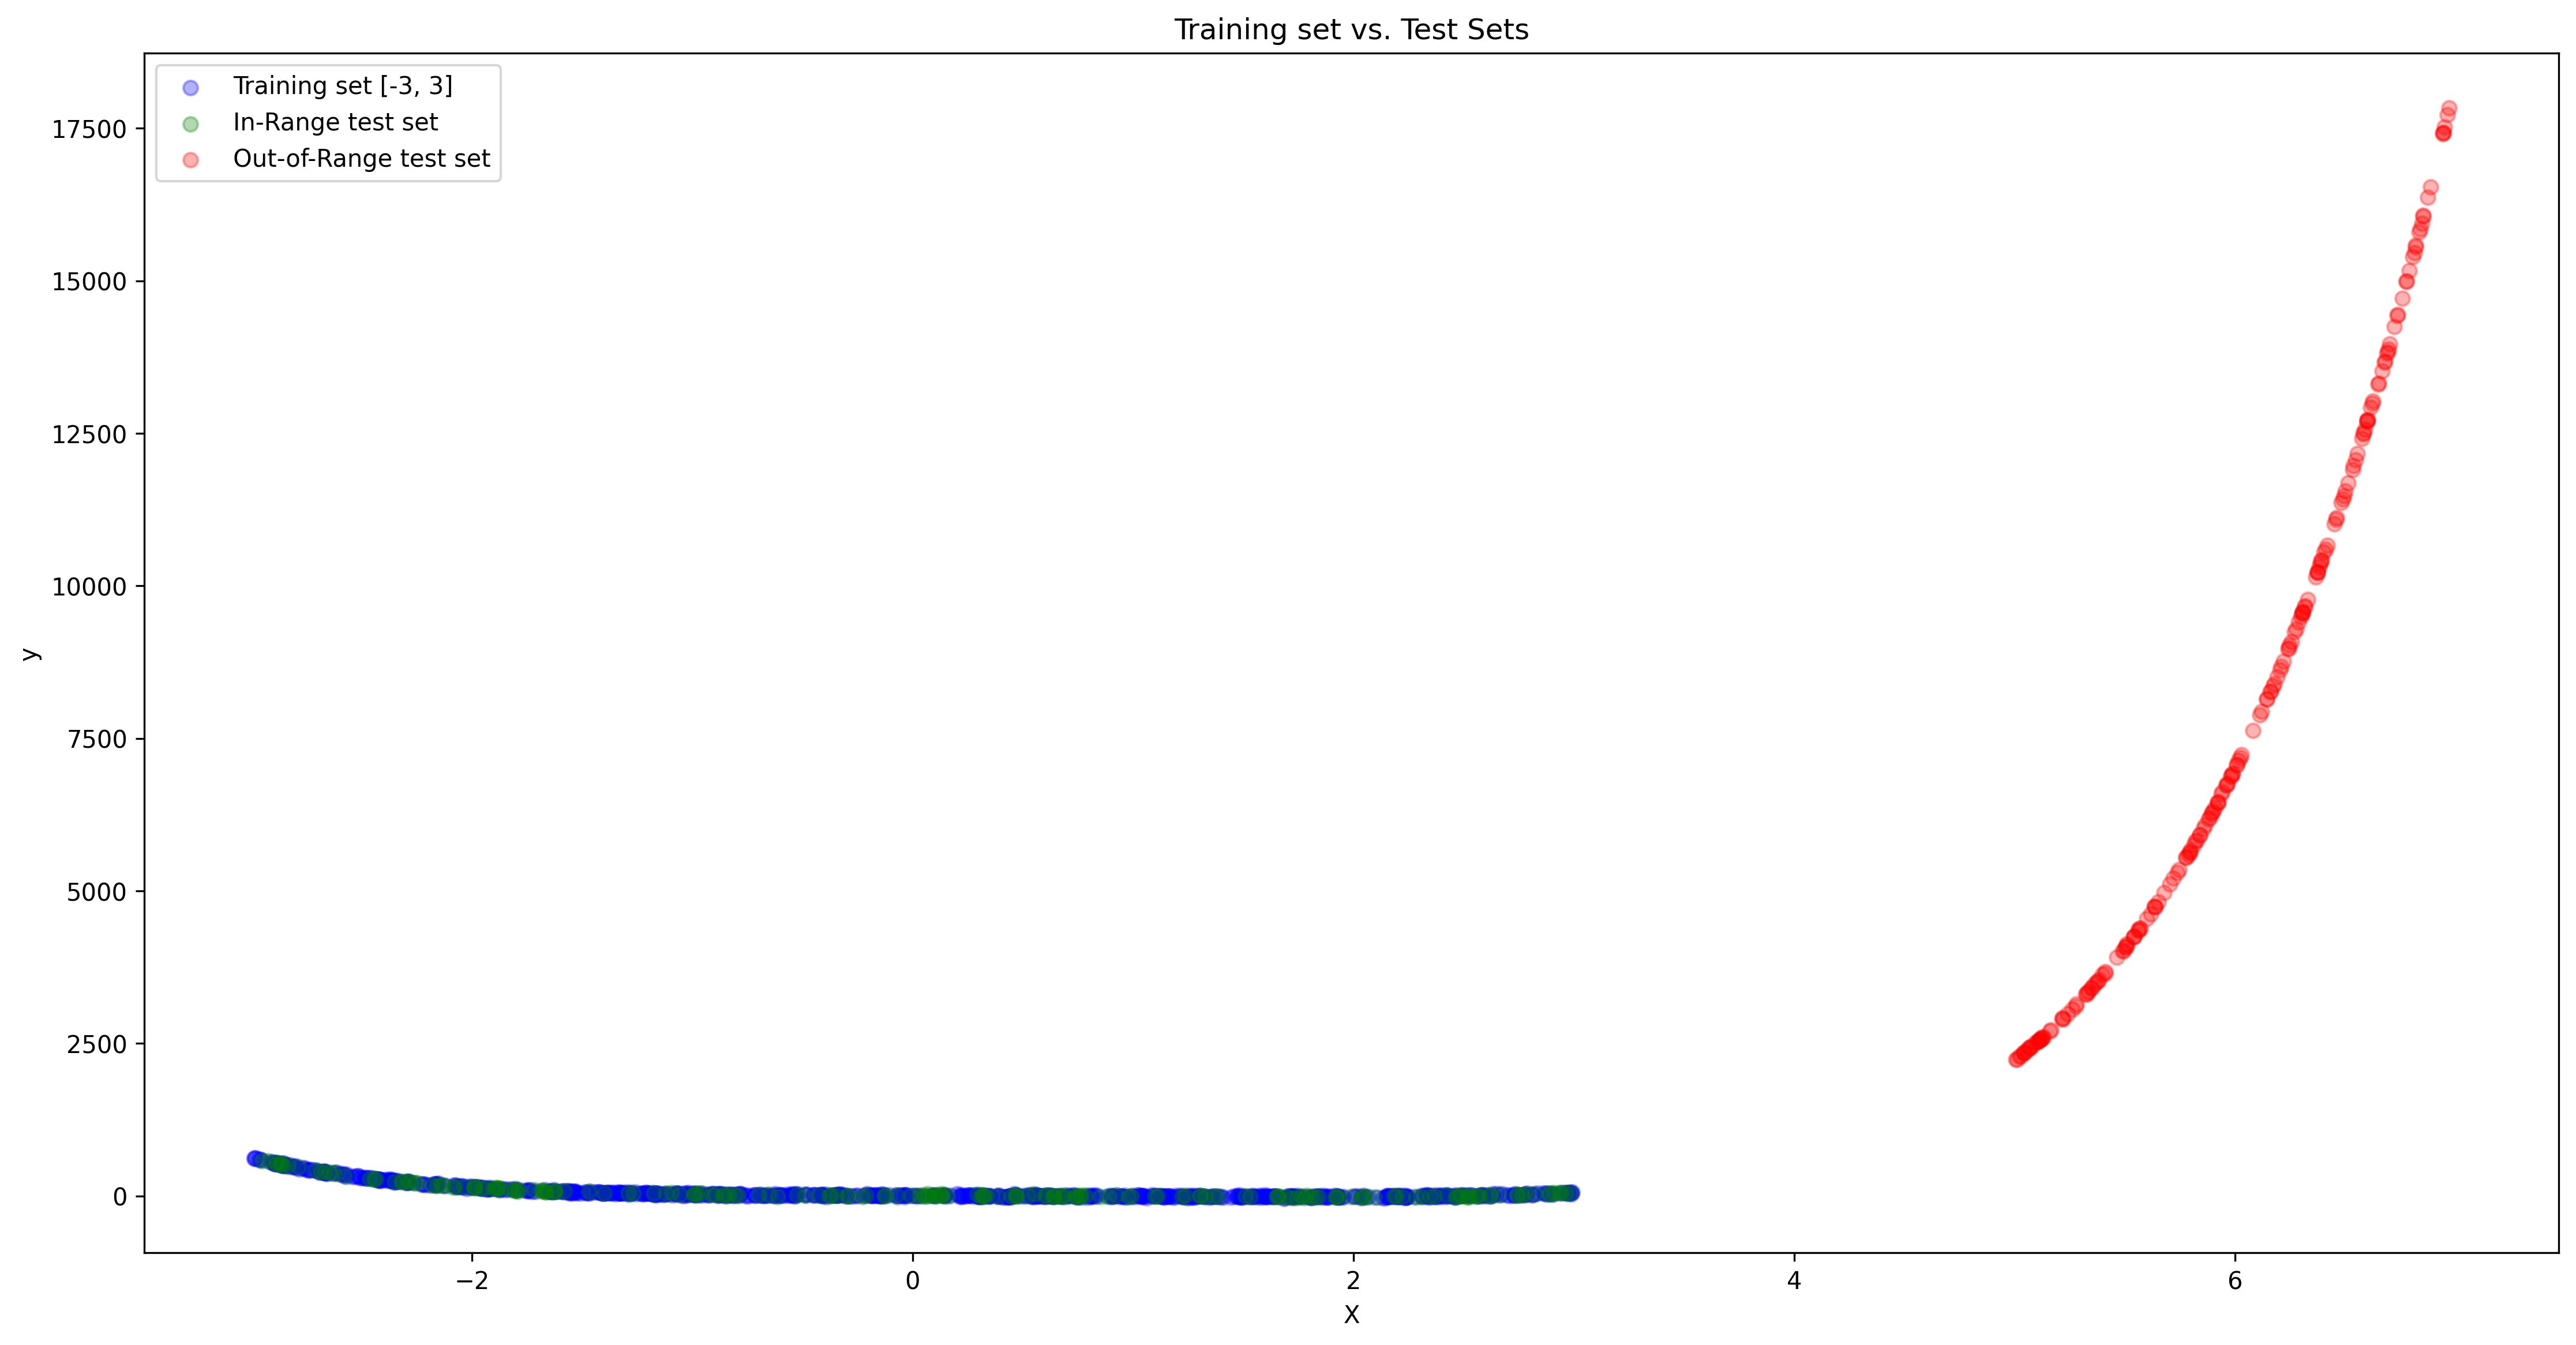

In [54]:
plt.figure(figsize=(18, 9) , dpi = 300)
plt.scatter(X_train, y_train, color='blue', alpha=0.3, label='Training set [-3, 3]')
plt.scatter(X_test_in_range, y_test_in_range, color='green', alpha=0.3, label='In-Range test set')
plt.scatter(X_out_of_range, y_out_of_range, color='red', alpha=0.3, label='Out-of-Range test set')

plt.title('Training set vs. Test Sets')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.show()

## 3. Polynomial Regression Training (25 Points)

In this task, you should train polynomial regression models with varying degrees, ranging from degree = 2 to degree = 9. You can use the `preprocessing`, `linear_model`, and `pipeline` classes from the `sklearn` library to create and evaluate these models.

In [55]:
def train_models(X, y, degree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())

    model.fit(X.reshape(-1, 1), y)

    return model

In [56]:
models = {}
degrees = range(2,10)

for degree in degrees:
    model = train_models(X, y, degree)
    models[degree] = model

## 4. Model Evaluation (20 Points)

In this task, you should evaluate the polynomial regression models on both test sets (In-Range Test Set and Out-of-Range Test Set) using Mean Squared Error (MSE). This evaluation will help you understand how well each model generalizes to different data ranges.

For each polynomial degree, compute the MSE on both the in-range test set and the out-of-range test set using the `mean_squared_error` function from the `sklearn` library.

In [57]:
def evaluate_models(models, X_test, y_test):
    losses = {}
    for degree, model in models.items():
        y_pred = model.predict(X_test.reshape(-1, 1))

        mse = mean_squared_error(y_test, y_pred)

        losses[degree] = mse
    return losses

In [58]:
train_mse = evaluate_models(models, X_train, y_train)
in_range_mse = evaluate_models(models, X_test_in_range, y_test_in_range)
out_of_range_mse = evaluate_models(models, X_out_of_range, y_out_of_range)

## 5. Analyzing Model Scores (20 Points)

In this task, you will visualize and analyze the performance of polynomial regression models by plotting the **logarithm** (to better visualize differences) of losses (Mean Squared Error, MSE) for both training and test set and also by printing the losses related to each degree.

Make sure to train each model a few times to get a sense of variability in the results.

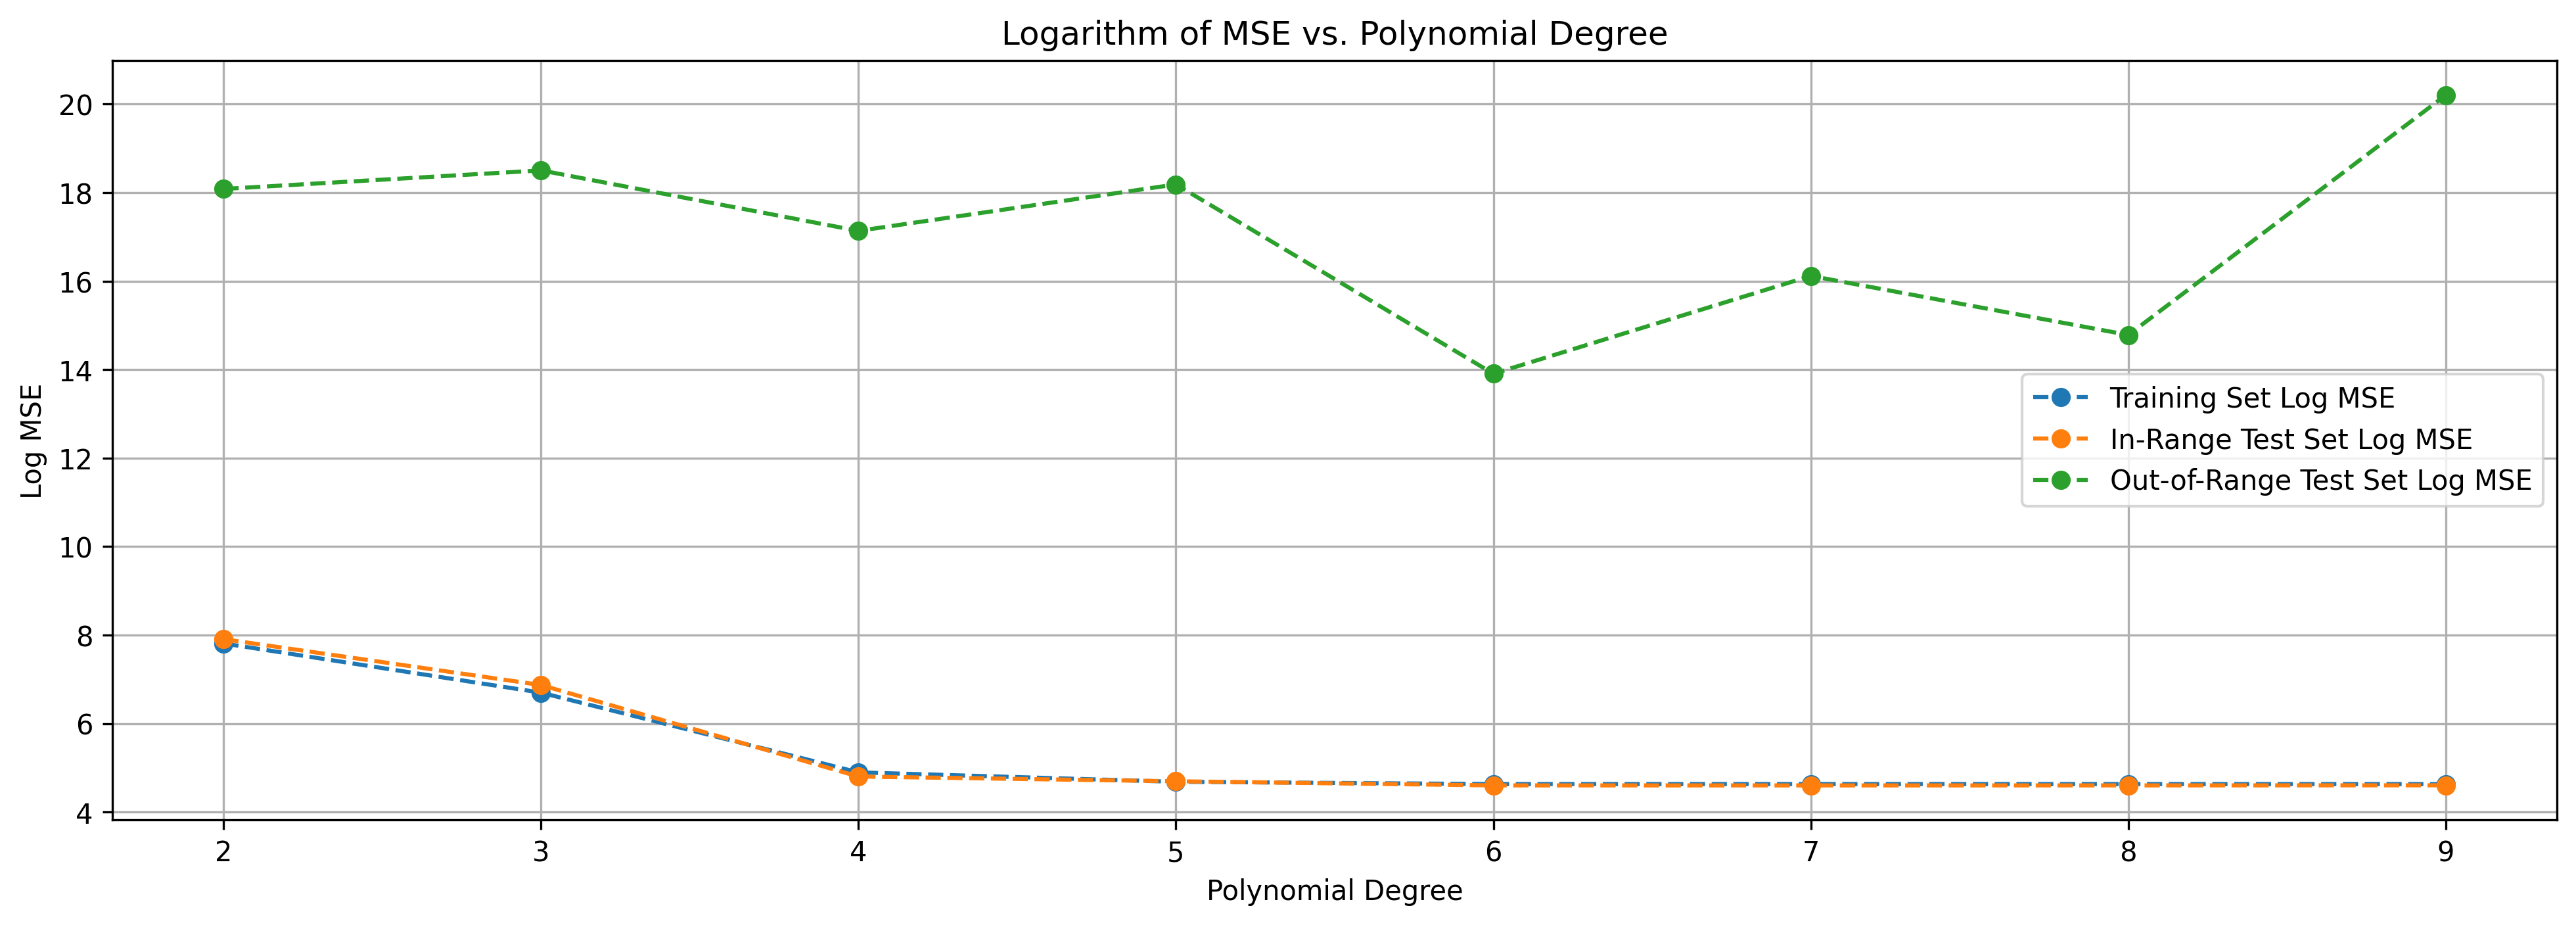

In [59]:
log_train_mse = {key: np.log(value) for key, value in train_mse.items()}
log_in_range_mse = {key: np.log(value) for key, value in in_range_mse.items()}
log_out_of_range_mse = {key: np.log(value) for key, value in out_of_range_mse.items()}

PolynomialDegree = log_train_mse.keys()

plt.figure(figsize=(16, 5) , dpi = 300)
plt.plot(PolynomialDegree, log_train_mse.values(), marker='o', label='Training Set Log MSE', linestyle='--')
plt.plot(PolynomialDegree, log_in_range_mse.values(), marker='o', label='In-Range Test Set Log MSE', linestyle='--')
plt.plot(PolynomialDegree, log_out_of_range_mse.values(), marker='o', label='Out-of-Range Test Set Log MSE', linestyle='--')

plt.title('Logarithm of MSE vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Log MSE')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
df = {
    "Degree": list(log_train_mse.keys()),
    "Train MSE": list(log_train_mse.values()),
    "In-Range Test MSE": list(log_in_range_mse.values()),
    "Out-of-Range Test MSE": list(log_out_of_range_mse.values())
}
df = pd.DataFrame(df)

df

,Degree,Train MSE,In-Range Test MSE,Out-of-Range Test MSE
0,2,7.811195,7.908189,18.084449
1,3,6.699005,6.870666,18.503788
2,4,4.896676,4.802778,17.136939
3,5,4.684077,4.695544,18.186591
4,6,4.632689,4.602348,13.907616
5,7,4.632430,4.602039,16.118729
6,8,4.632344,4.602352,14.783875
7,9,4.631736,4.604340,20.205546


## Conclusion (15 Points)

1. Based on your analysis of the training set loss, in-range test set loss, and out-of-range test set loss across different polynomial degrees, summarize what you have learned about the bias-variance tradeoff. How do these losses illustrate the tradeoff between model complexity and performance?

<span style="color:blue;">
When the model's degree increases, it tends to pick up on noise, leading to higher variance (reflected in out-of-range losses) but reduced bias (shown in training loss). Increasing the degree also adds complexity, allowing the model to capture more detailed data patterns and lowering training errors. The best-performing model degree usually falls somewhere between very low and high degrees (6 in this case). After this range, the loss reduction becomes minimal, and the model shows overfitting signs.

In essence, as the model’s degree rises, complexity and variance also rise, which in turn lowers bias. The ideal degree is reached when any further reduction in loss no longer justifies the added complexity.</span>

2. Reflecting on the trends observed in the losses as polynomial degree increases, what conclusions can you draw about the effects of model complexity on overfitting and underfitting? How does this understanding help in selecting the appropriate polynomial degree for a model?

<span style="color:blue;">Increasing the model’s degree, as covered in part 1, raises its variance and complexity, which heightens the risk of overfitting. Conversely, underfitting happens when the model lacks the complexity needed to capture essential patterns. Recognizing this trade-off allows us to pinpoint the balance where we can choose the most suitable model.</span>

# Regularization (50 Points)

# **Introduction**

In this part, you will work with a real dataset that includes information about the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. <a ref= 'https://github.com/stedy/Machine-Learning-with-R-datasets'>Reference</a>

Columns available:

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

# Plan

- First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

- Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients.

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe

In [61]:
file_path = "./InsuranceData.csv"
df = pd.read_csv(file_path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Get a brief description and do some EDA to get familiar with the dataset

In [62]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [64]:
def summarize_dataframe(df):
    summary = {
        'Column': [],
        'Data Type': [],
        'Unique Values': [],
        'Missing Values': [],
        'Mean': [],
        'Median': []
    }

    for column in df.columns:
        summary['Column'].append(column)
        summary['Data Type'].append(df[column].dtype)
        summary['Unique Values'].append(df[column].nunique())
        summary['Missing Values'].append(df[column].isnull().sum())

        if pd.api.types.is_numeric_dtype(df[column]):
            summary['Mean'].append(df[column].mean())
            summary['Median'].append(df[column].median())
        else:
            summary['Mean'].append(None)
            summary['Median'].append(None)

    summary_df = pd.DataFrame(summary)
    return summary_df

summarize_dataframe(df)

,Column,Data Type,Unique Values,Missing Values,Mean,Median
0,age,int64,47,0,39.207025,39.000
1,sex,object,2,0,NaN,NaN
2,bmi,float64,548,0,30.663397,30.400
3,children,int64,6,0,1.094918,1.000
4,smoker,object,2,0,NaN,NaN
5,region,object,4,0,NaN,NaN
6,charges,float64,1337,0,13270.422265,9382.033


In [65]:
def unique_categorical_values(df):
    unique_values = {}
    for column in df.select_dtypes(include=['object', 'category']).columns:
        unique_values[column] = df[column].unique()
    return unique_values

unique_categorical_values(df)

{'sex': array(['female', 'male'], dtype=object),
 'smoker': array(['yes', 'no'], dtype=object),
 'region': array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)}

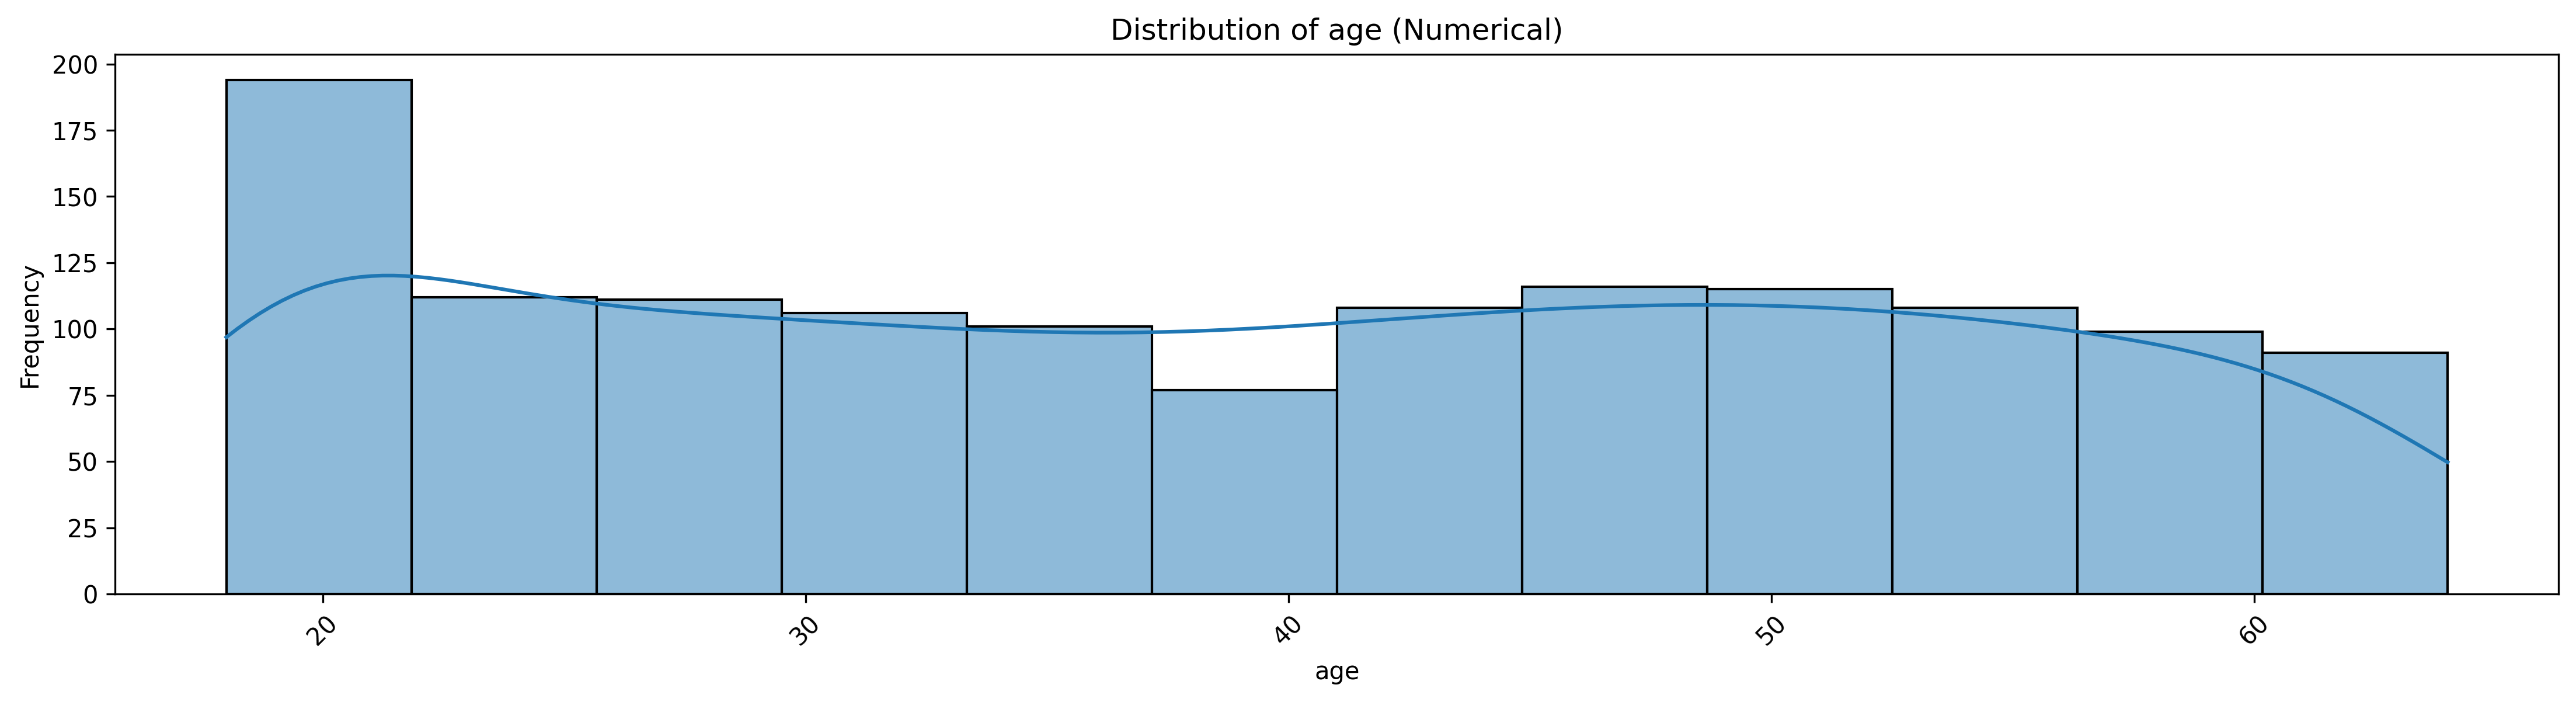

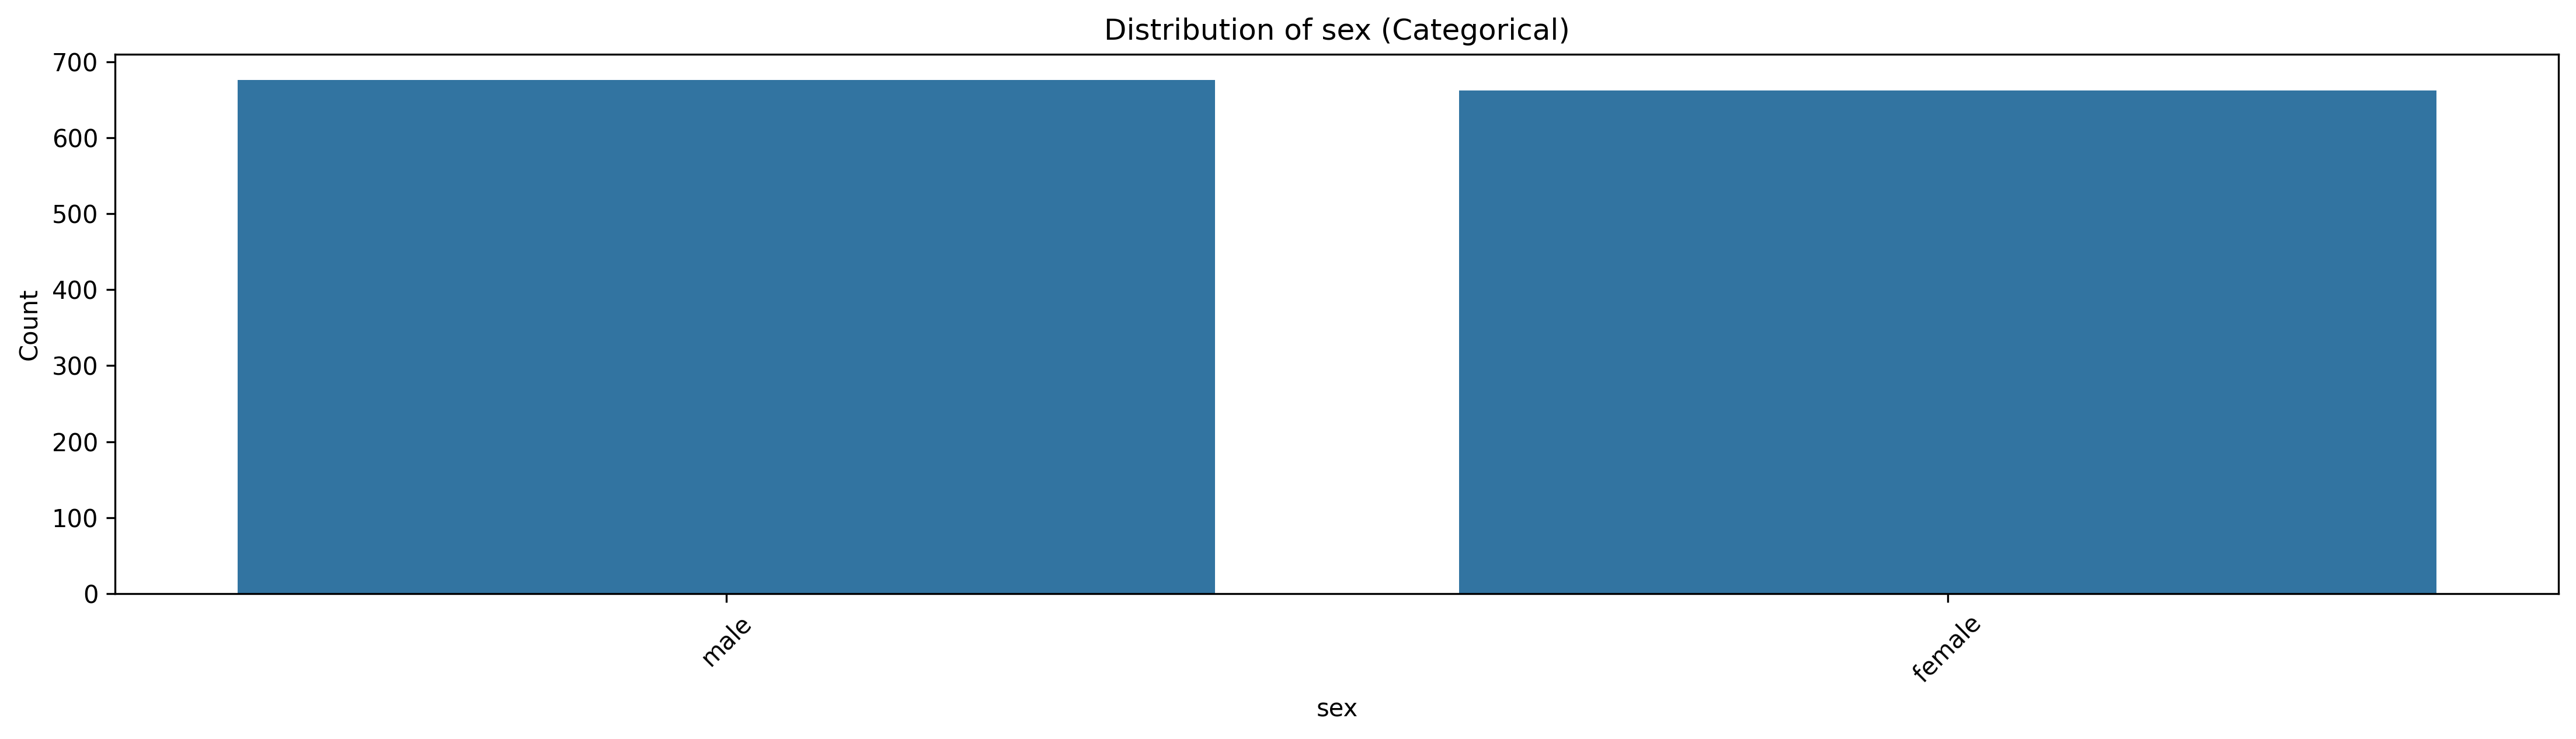

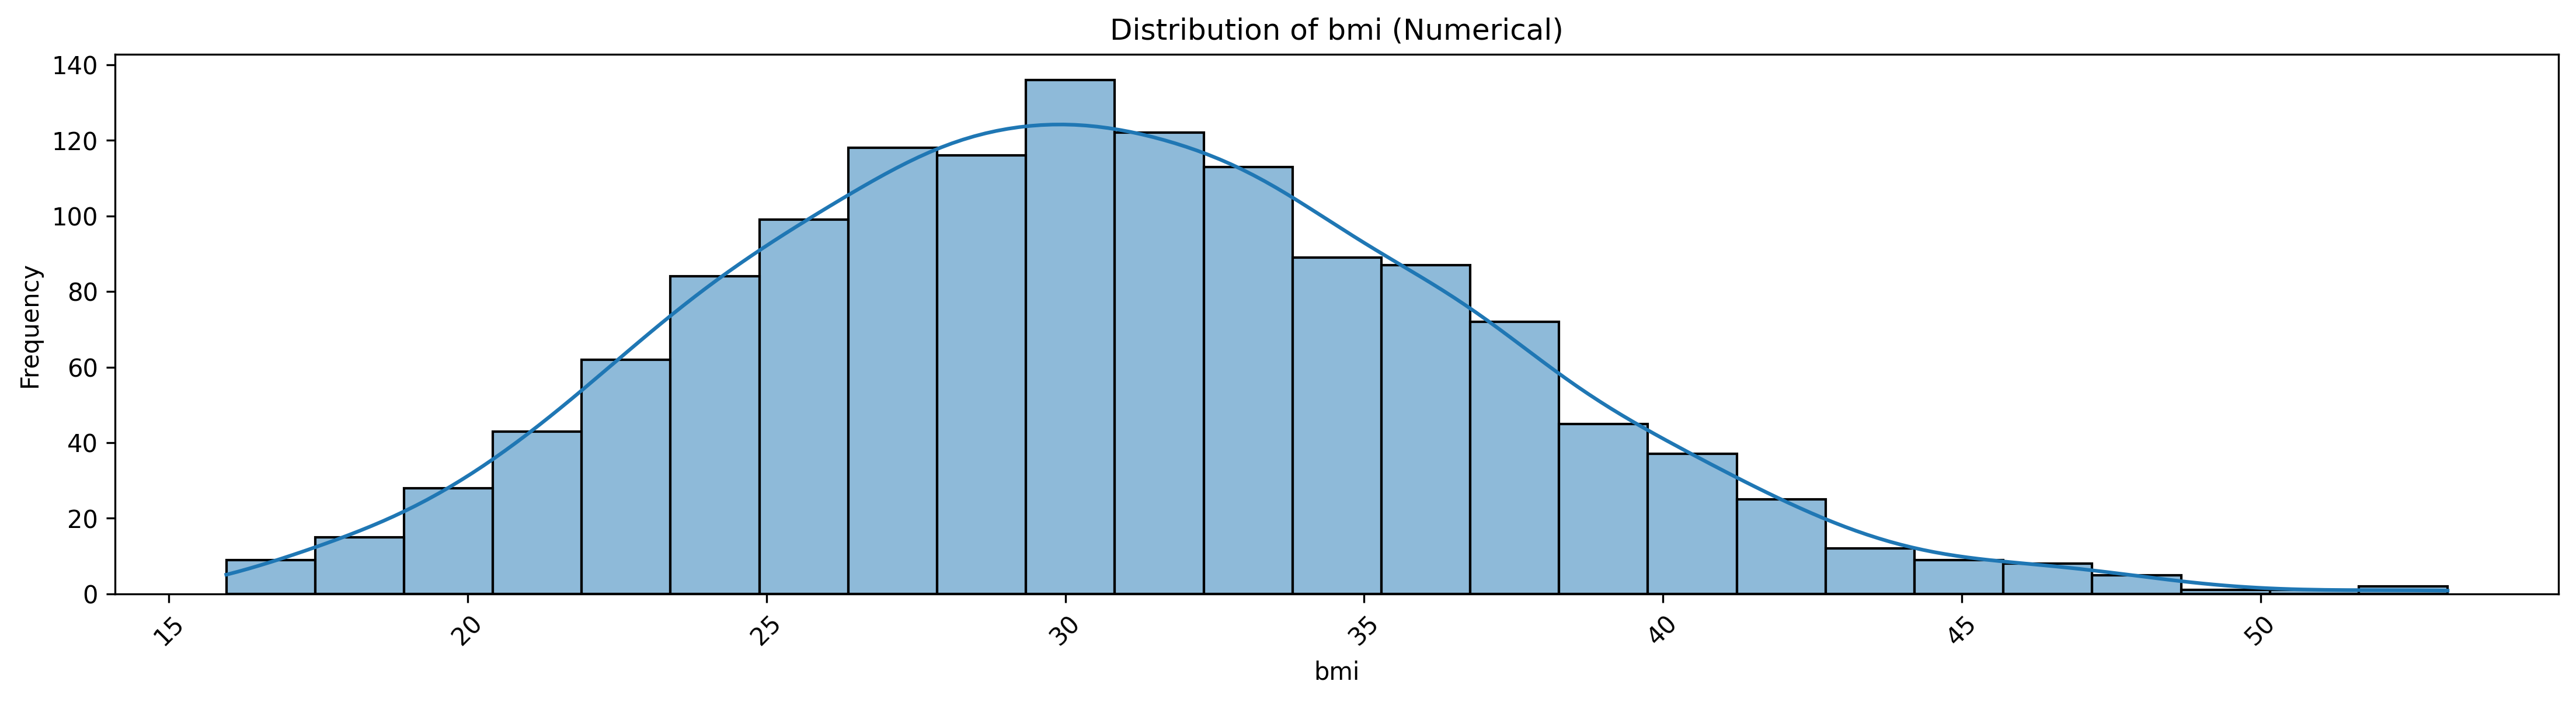

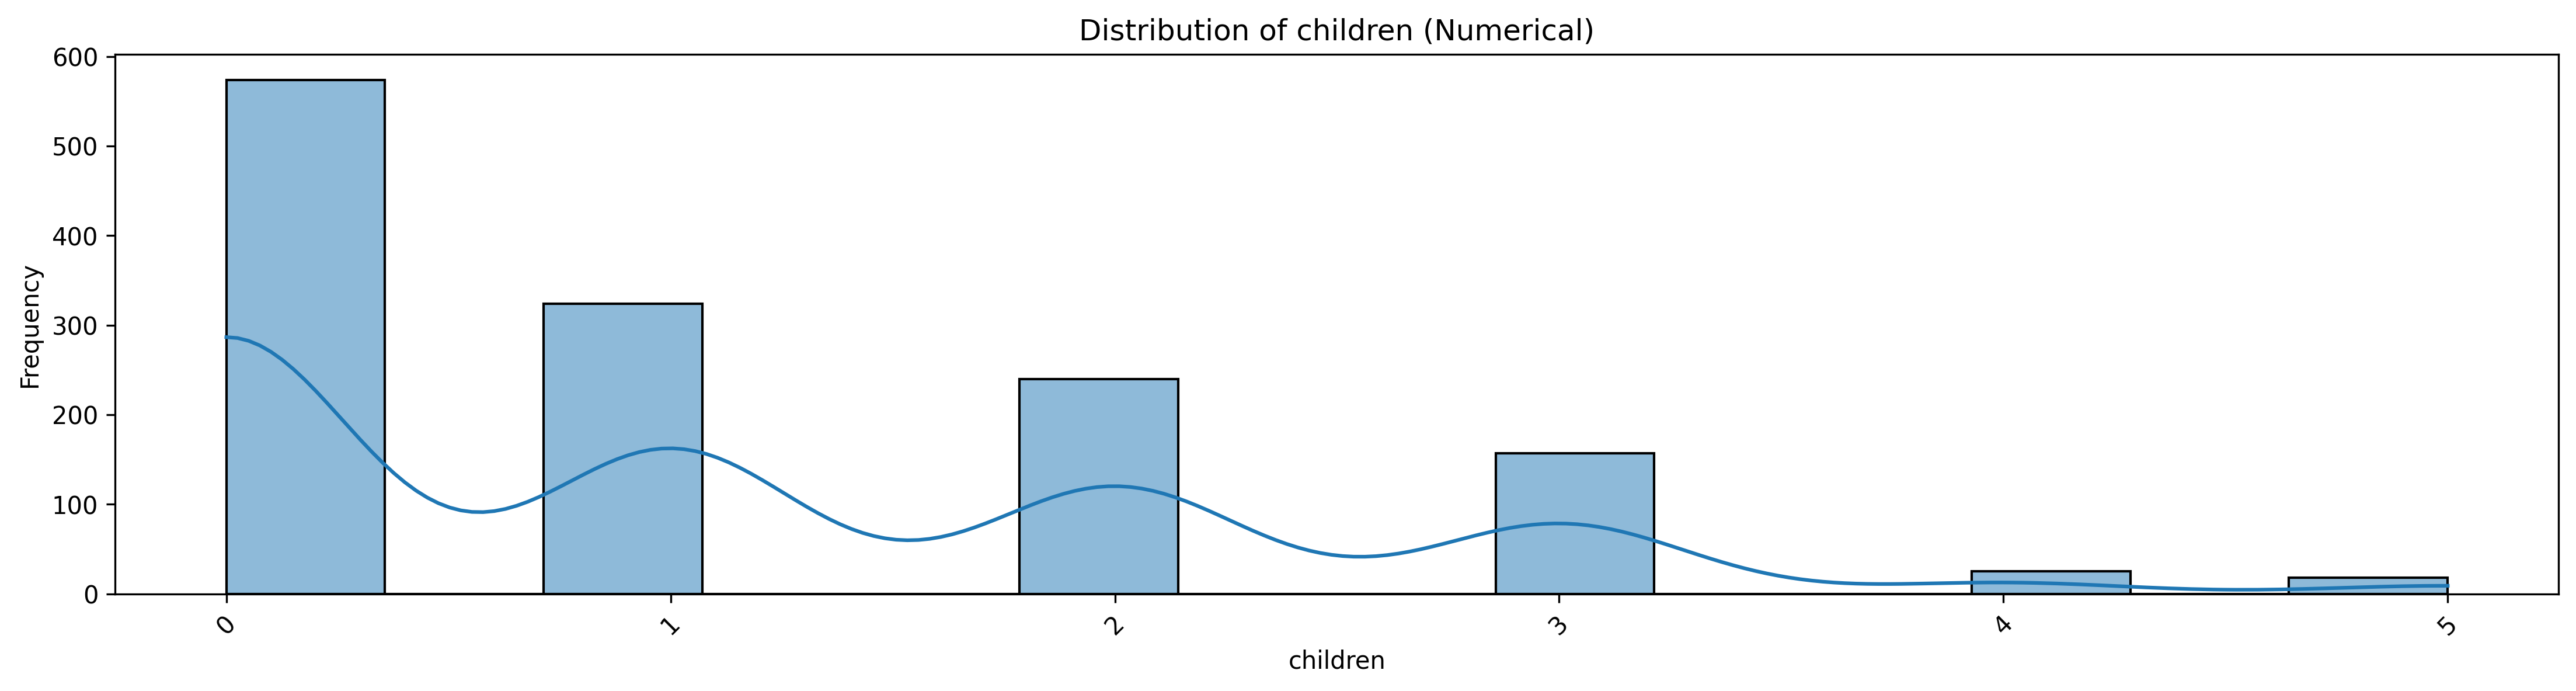

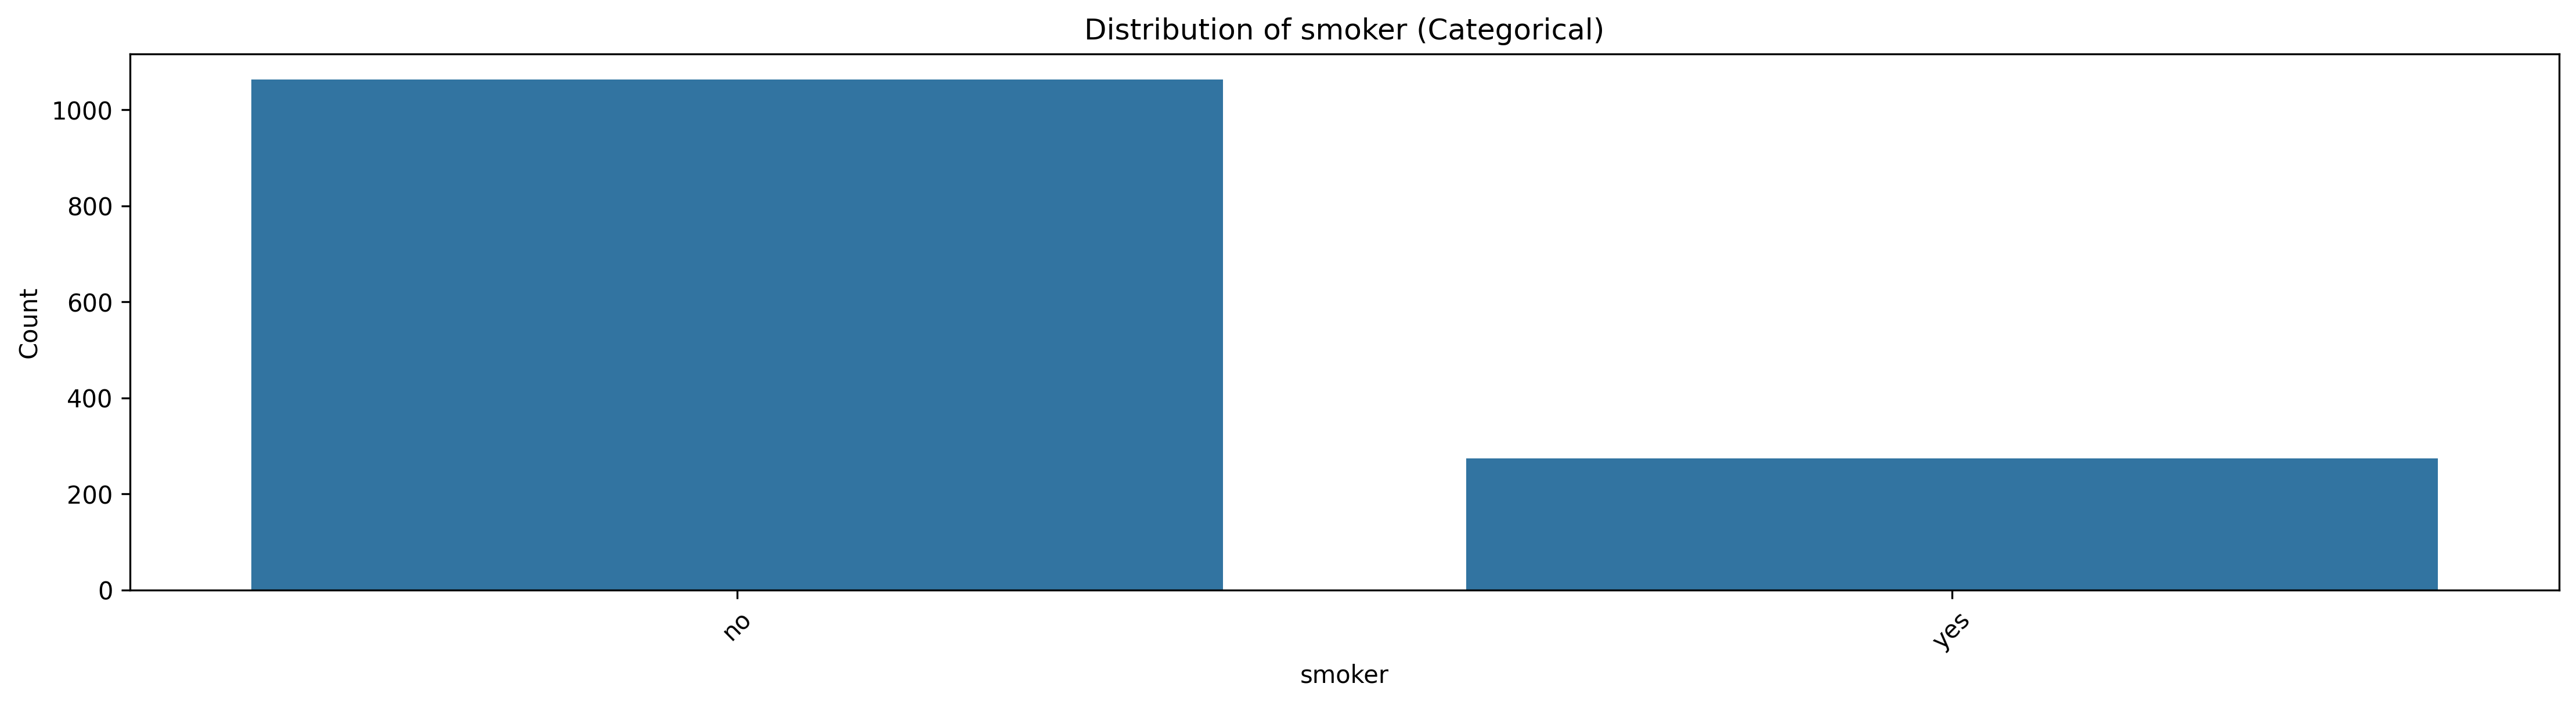

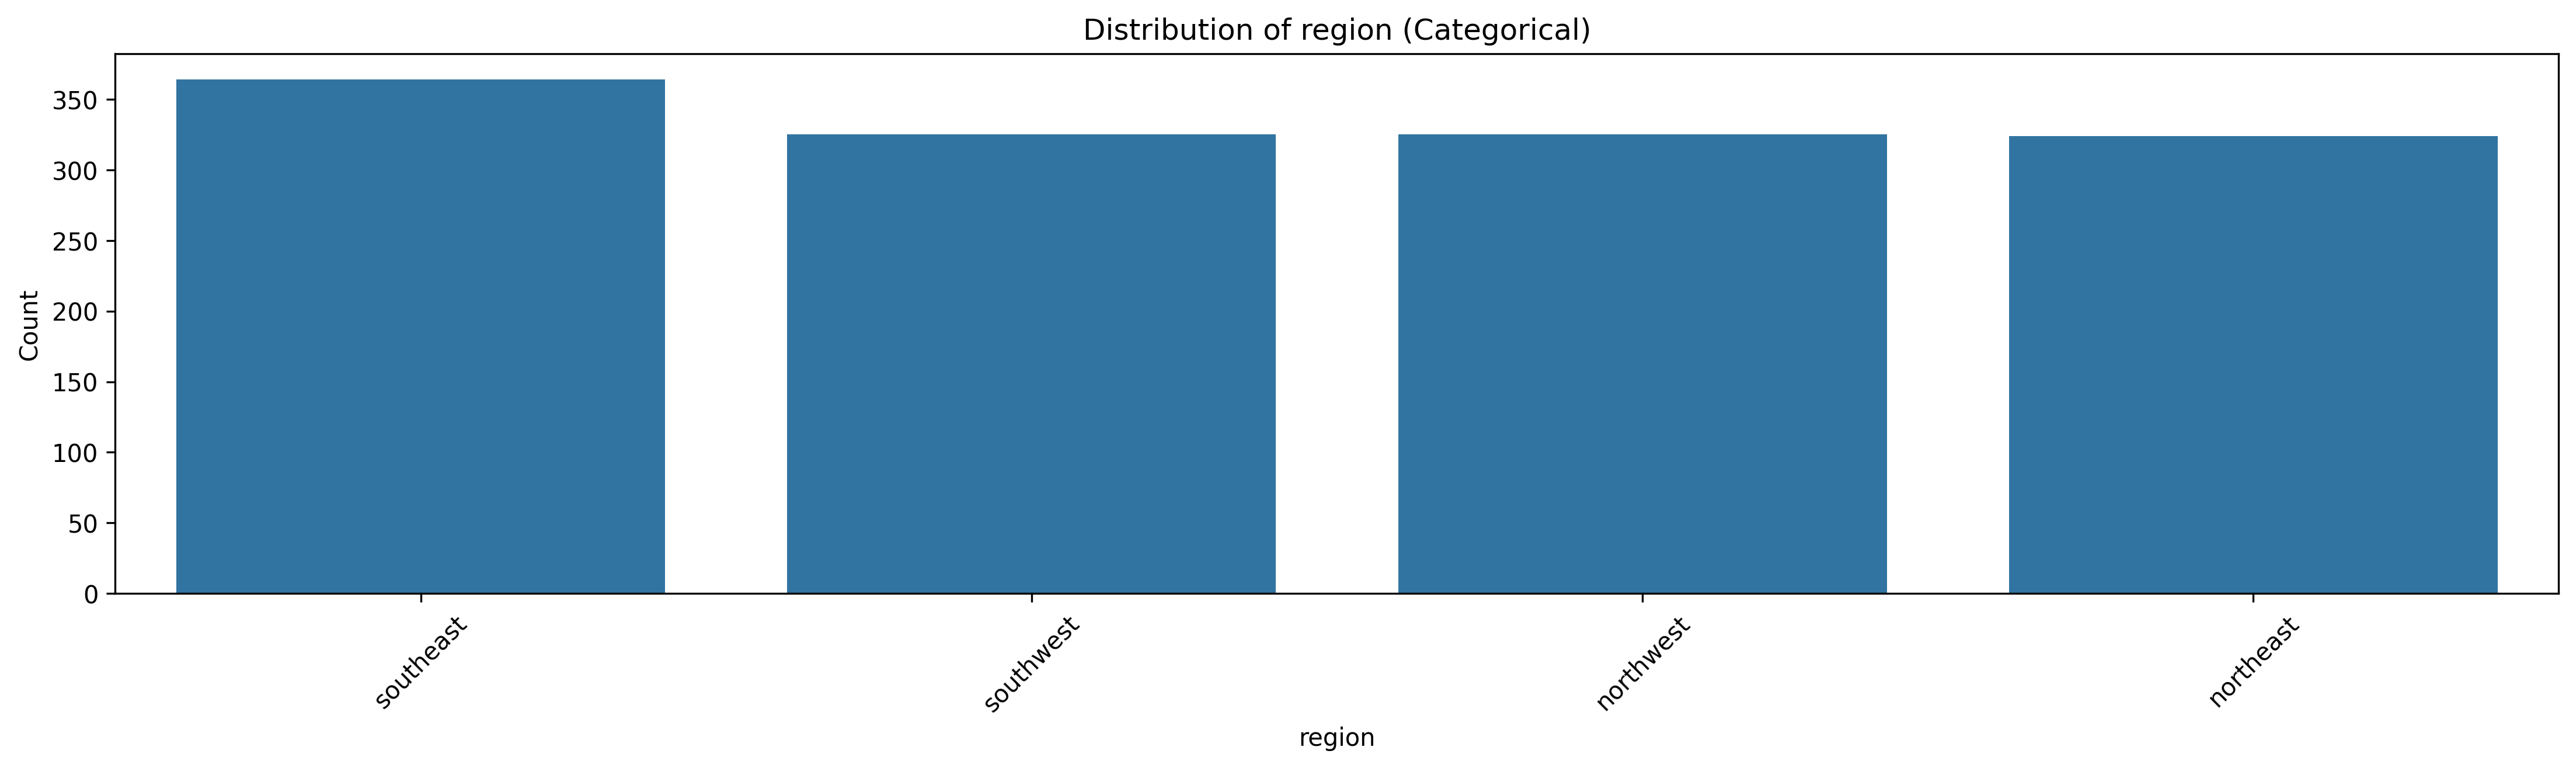

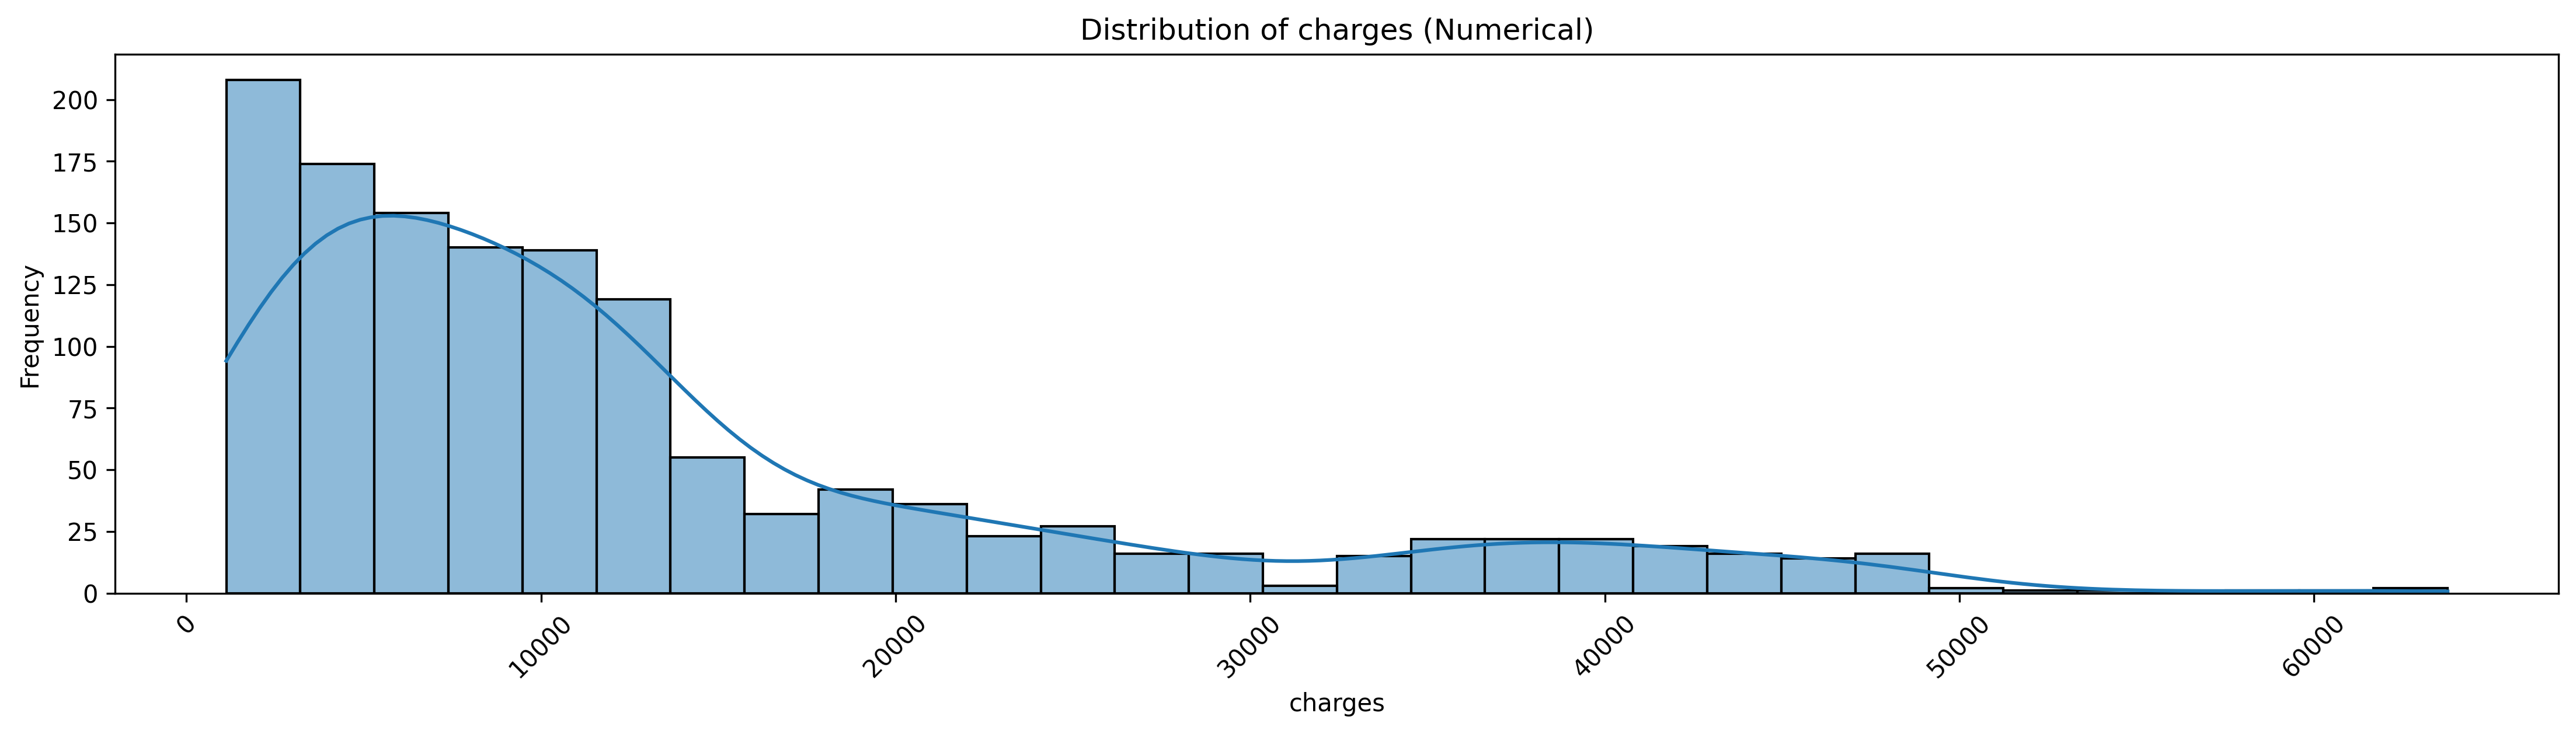

In [66]:
def plot_column_distributions(df):
    for column in df.columns:
        plt.figure(figsize=(18, 4) , dpi = 300)
        if pd.api.types.is_numeric_dtype(df[column]):
            sns.histplot(df[column].dropna(), kde=True)
            plt.title(f"Distribution of {column} (Numerical)")
            plt.xlabel(column)
            plt.ylabel("Frequency")
        else:
            sns.countplot(x=df[column], order=df[column].value_counts().index)
            plt.title(f"Distribution of {column} (Categorical)")
            plt.xlabel(column)
            plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()

plot_column_distributions(df)

# Preprocessing

### Converting Categorical Variables to Numerical Features


In [67]:
def binary_encode(df, column_name):

    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")

    unique_values = df[column_name].unique()

    if len(unique_values) != 2:
        raise ValueError(f"Column '{column_name}' is not binary. It contains more than two unique values.")

    mapping = {unique_values[0]: 0, unique_values[1]: 1}

    df[column_name] = df[column_name].map(mapping)

binary_encode(df, "sex")
binary_encode(df, "smoker")
df = pd.get_dummies(df, columns=['region'])

In [68]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,0,16884.92400,False,False,False,True
1,18,1,33.770,1,1,1725.55230,False,False,True,False
2,28,1,33.000,3,1,4449.46200,False,False,True,False
3,33,1,22.705,0,1,21984.47061,False,True,False,False
4,32,1,28.880,0,1,3866.85520,False,True,False,False


In [69]:
summarize_dataframe(df)

,Column,Data Type,Unique Values,Missing Values,Mean,Median
0,age,int64,47,0,39.207025,39.000
1,sex,int64,2,0,0.505232,1.000
2,bmi,float64,548,0,30.663397,30.400
3,children,int64,6,0,1.094918,1.000
4,smoker,int64,2,0,0.795217,1.000
5,charges,float64,1337,0,13270.422265,9382.033
6,region_northeast,bool,2,0,0.242152,0.000
7,region_northwest,bool,2,0,0.242900,0.000
8,region_southeast,bool,2,0,0.272048,0.000
9,region_southwest,bool,2,0,0.242900,0.000


### Outlier Detection

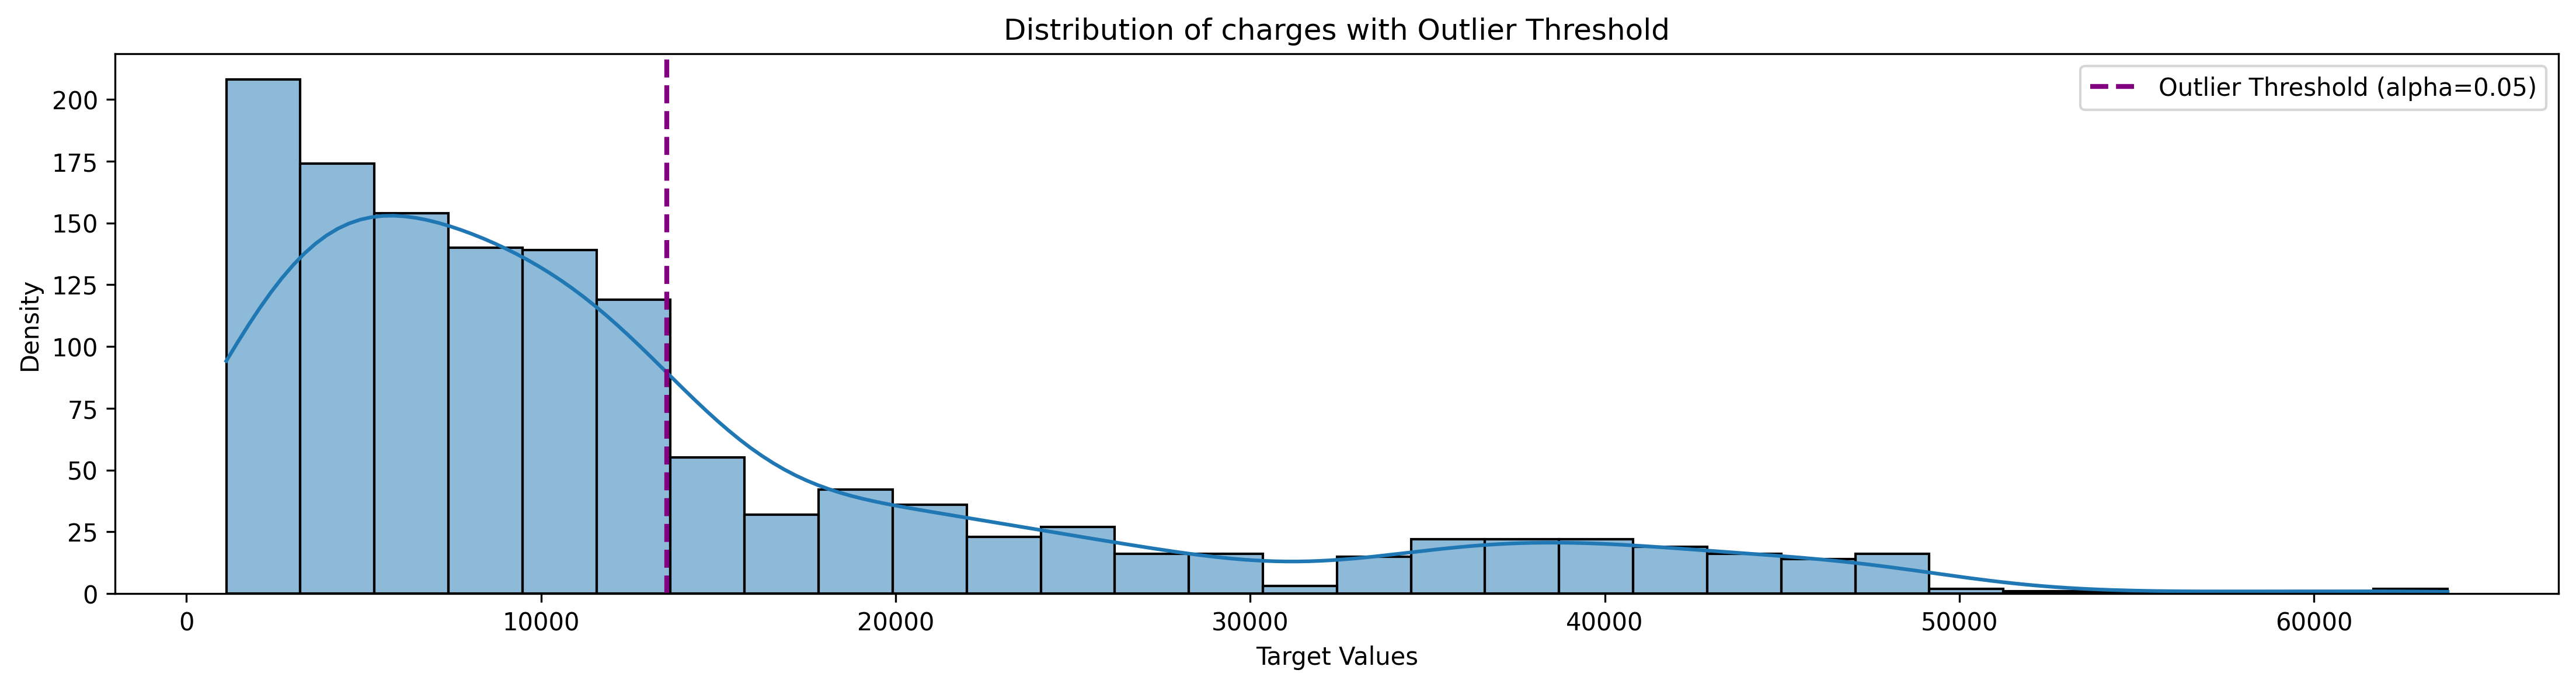

In [70]:
def plot_chi_square_outliers(df, target_column, alpha=0.05):

    mean_value = df[target_column].mean()
    dof = mean_value

    threshold = chi2.ppf(1 - alpha, dof)

    plt.figure(figsize=(18, 4) , dpi = 300)

    sns.histplot(df[target_column].dropna(), kde=True)
    x = np.linspace(0, df[target_column].max(), 1000)
    plt.axvline(threshold, color='purple', linestyle='--', lw=2, label=f'Outlier Threshold (alpha={alpha})')

    plt.xlabel('Target Values')
    plt.ylabel('Density')
    plt.title(f'Distribution of {target_column} with Outlier Threshold')
    plt.legend()
    plt.show()

    df_no_outliers = df[df[target_column] <= threshold]

    return df_no_outliers

df = plot_chi_square_outliers(df, "charges", alpha = 0.05)

### Data Splitting

In [71]:
X = df.drop(columns=['charges'], axis=1)
y = df['charges']

X_train_data, X_validation_data, y_train_data, y_validation_data = train_test_split(X, y, test_size=0.2, shuffle=True)

print("Train set shape (features):", X_train_data.shape)
print("Train set shape (target):", y_train_data.shape)
print("Validation set shape (features):", X_validation_data.shape)
print("Validation set shape (target):", y_validation_data.shape)

Train set shape (features): (744, 9)
Train set shape (target): (744,)
Validation set shape (features): (186, 9)
Validation set shape (target): (186,)


In [72]:
y_train_data = np.array(y_train_data)
y_validation_data = np.array(y_validation_data)

### Normalization

In [73]:
feature_names = X_train_data.columns

In [74]:
scaler_X = StandardScaler()

X_train_normalized = scaler_X.fit_transform(X_train_data)
X_validation_normalized = scaler_X.transform(X_validation_data)

# Training

Fit a linear regressor to the data.

In [75]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_normalized, y_train_data)

y_pred = linear_regressor.predict(X_validation_normalized)

mse = mean_squared_error(y_validation_data, y_pred)
mape = mean_absolute_percentage_error(y_validation_data, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Percentage Error: {mape}")

Mean Squared Error: 1099175.3208632304
Mean Absolute Percentage Error: 0.09607925079498797


Get the coefficients of the variables and visualize it

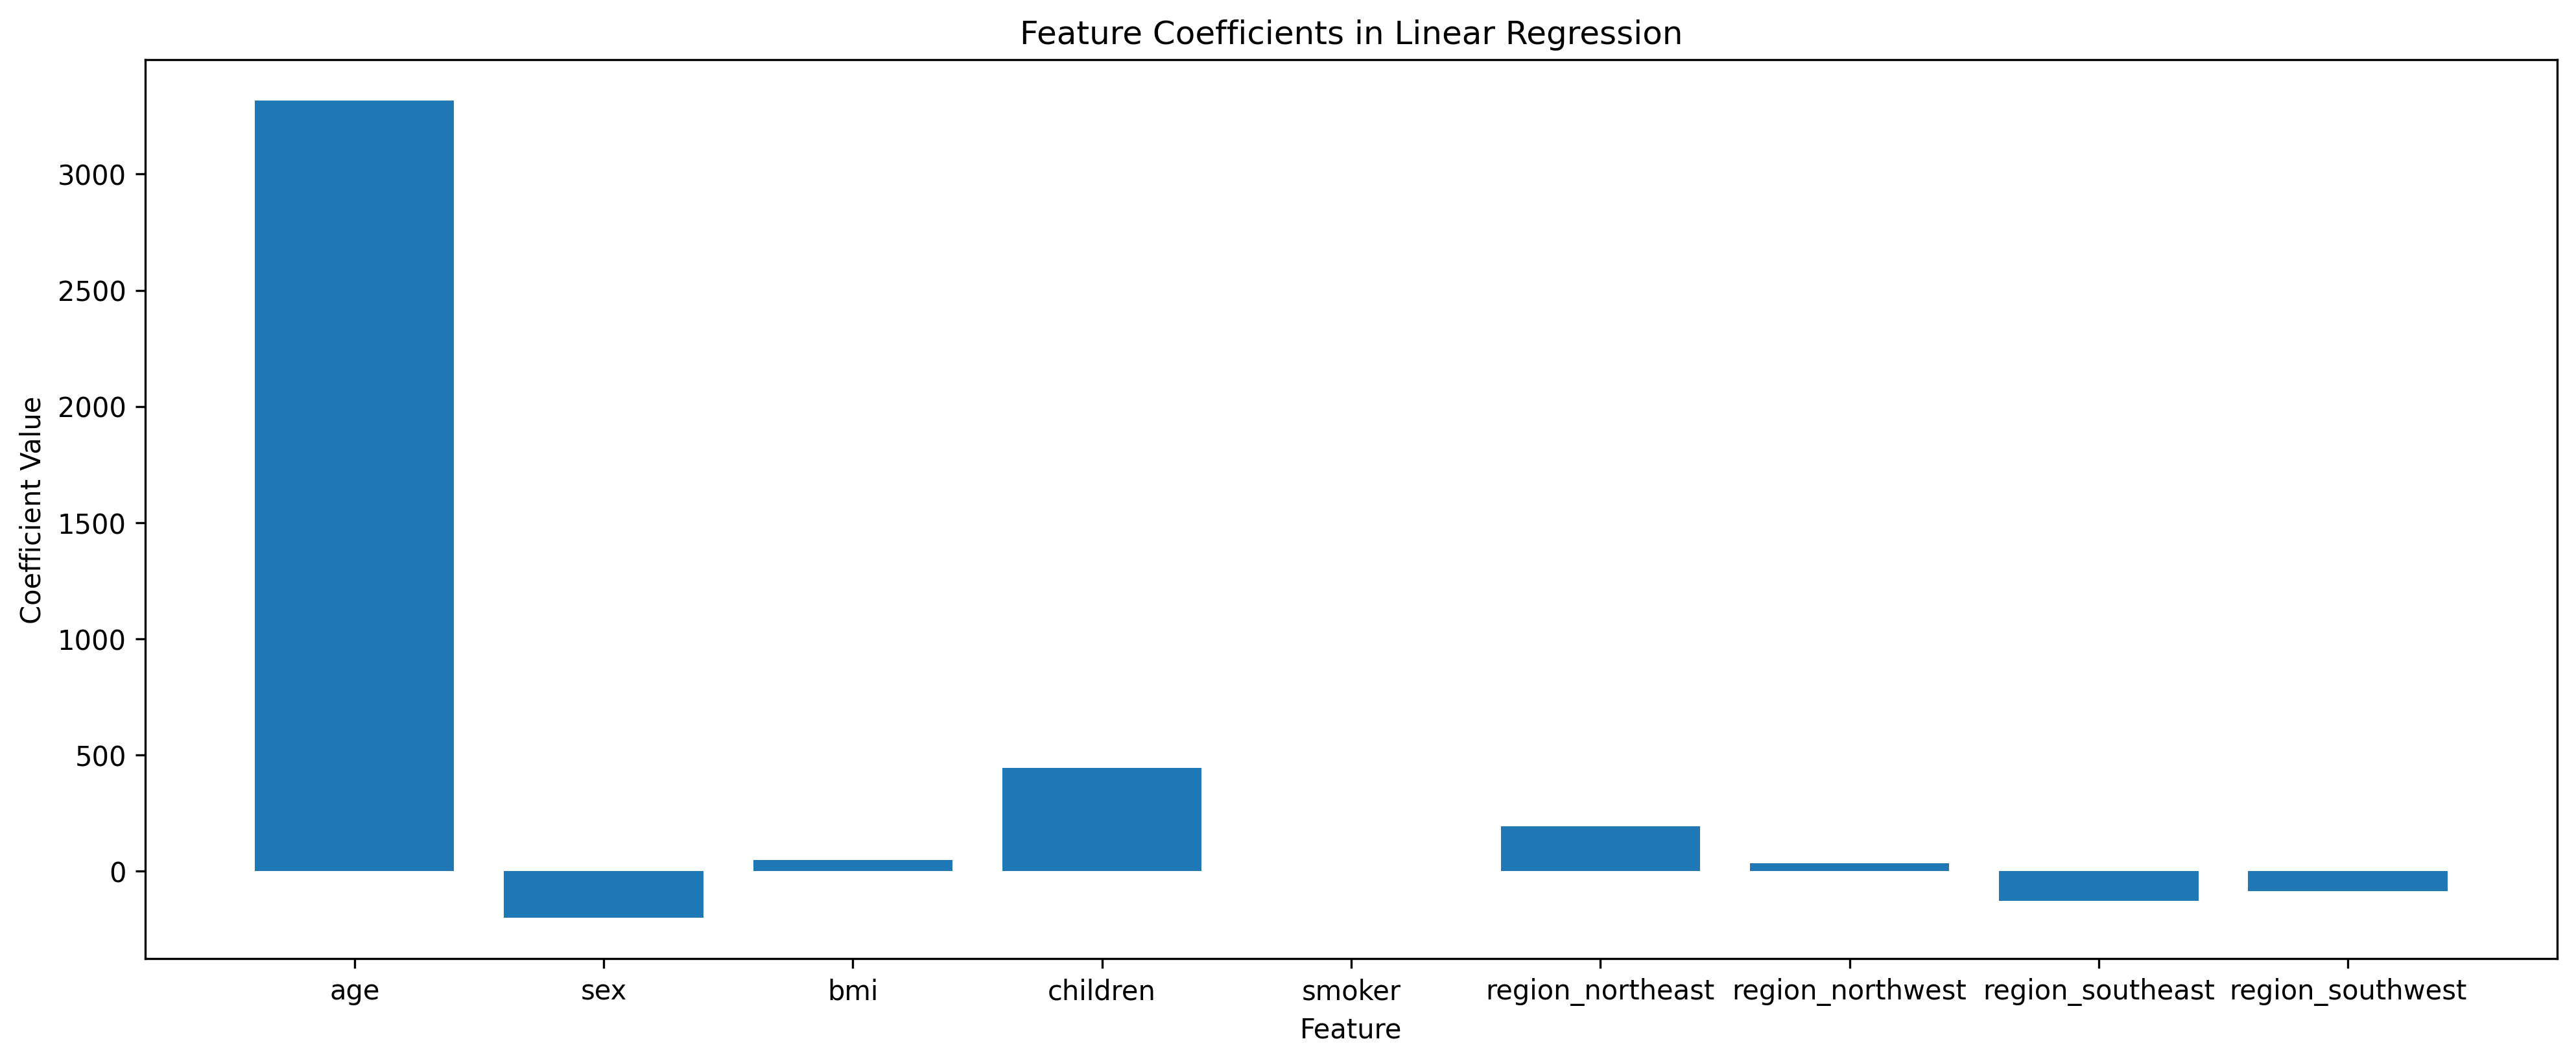

In [76]:
coefficients = linear_regressor.coef_

plt.figure(figsize=(16, 6) , dpi = 300)
plt.bar(feature_names, coefficients)
plt.xlabel("Feature")
plt.ylabel("Coefficient Value")
plt.title("Feature Coefficients in Linear Regression")
plt.show()

In [77]:
print(coefficients)

[ 3.31633699e+03 -2.01498589e+02  4.71618995e+01  4.44482087e+02
  3.19744231e-14  1.91678184e+02  3.30780021e+01 -1.28818881e+02
 -8.64946066e+01]


# Regularization

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [96]:
lasso_regressor = Lasso(alpha=0.1)

lasso_regressor.fit(X_train_normalized, y_train_data)

y_pred_lasso = lasso_regressor.predict(X_validation_normalized)


mse_lasso = mean_squared_error(y_validation_data, y_pred_lasso)
mape_lasso = mean_absolute_percentage_error(y_validation_data, y_pred_lasso)

print(f"Lasso Regression - Mean Squared Error: {mse_lasso}")
print(f"Lasso Regression - Mean Absolute Percentage Error: {mape_lasso}")

Lasso Regression - Mean Squared Error: 1099167.7574701288
Lasso Regression - Mean Absolute Percentage Error: 0.09607111399800057


L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [97]:
ridge_regressor = Ridge(alpha=0.1)

ridge_regressor.fit(X_train_normalized, y_train_data)

y_pred_ridge = ridge_regressor.predict(X_validation_normalized)

mse_ridge = mean_squared_error(y_validation_data, y_pred_ridge)
r2_ridge = r2_score(y_validation_data, y_pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_validation_data, y_pred_ridge)

print(f"Ridge Regression - Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression - R^2 Score: {r2_ridge}")
print(f"Ridge Regression - Mean Absolute Percentage Error: {mape_ridge}")

Ridge Regression - Mean Squared Error: 1099254.891238394
Ridge Regression - R^2 Score: 0.9163309935024453
Ridge Regression - Mean Absolute Percentage Error: 0.09607134252671393


Test different regularization parameters (alpha) for each regularization method using cross validation and visualize the coefficients of the variables. Use MAPE for evaluation.

**Mean Absolute Percentage Error (MAPE)**:


 is a widely used metric for evaluating the accuracy of forecasting models. It quantifies the prediction error as a percentage, providing an intuitive measure of how far off predictions are from actual values. MAPE is defined as the average of the absolute percentage errors between predicted values and actual values. The formula for calculating MAPE is:

$$
\text{MAPE} = \frac{100}{N} \sum_{t=1}^{N} \left| \frac{A_t - F_t}{A_t} \right|
$$
    
Where:
- $N$ is the number of observations,
- $A_t$ is the actual value,
- $F_t$ is the forecasted value.

In [98]:
alphas = np.logspace(-6, 4, 600)

best_alpha = None
best_mape = float('inf')
best_model = None

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for alpha in alphas:
    mape_values = []

    for train_index, val_index in kf.split(X_train_normalized):
        X_train_cv, X_val_cv = X_train_normalized[train_index], X_train_normalized[val_index]
        y_train_cv, y_val_cv = y_train_data[train_index], y_train_data[val_index]

        lasso = Lasso(alpha=alpha, random_state=42, max_iter=100000, tol=1e-2)
        lasso.fit(X_train_cv, y_train_cv)

        y_val_pred = lasso.predict(X_val_cv)
        mape_values.append(
            mean_absolute_percentage_error(y_val_cv, y_val_pred))

    avg_mape = np.mean(mape_values)

    if avg_mape < best_mape:
        best_mape = avg_mape
        best_alpha = alpha
        best_model = lasso

print(f"Best alpha value: {best_alpha}")

best_model.fit(X_train_normalized, y_train_data.ravel())

y_pred_lasso = best_model.predict(X_validation_normalized)

mse_lasso = mean_squared_error(y_validation_data, y_pred_lasso)
r2_lasso = r2_score(y_validation_data, y_pred_lasso)
mape_lasso = mean_absolute_percentage_error(y_validation_data, y_pred_lasso)

print(f"Lasso Regression - Mean Squared Error: {mse_lasso}")
print(f"Lasso Regression - R^2 Score: {r2_lasso}")
print(f"Lasso Regression - Mean Absolute Percentage Error: {mape_lasso*100}")

Best alpha value: 13.444590513311867
Lasso Regression - Mean Squared Error: 1098467.204689844
Lasso Regression - R^2 Score: 0.9163909477054913
Lasso Regression - Mean Absolute Percentage Error: 9.580758565781625


In [99]:
alphas = np.logspace(-6, 6, 600)

best_alpha = None
best_mape = float('inf')
best_model = None

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for alpha in alphas:
    mape_values = []

    for train_index, val_index in kf.split(X_train_normalized):
        X_train_cv, X_val_cv = X_train_normalized[train_index], X_train_normalized[val_index]
        y_train_cv, y_val_cv = y_train_data[train_index], y_train_data[val_index]

        ridge = Ridge(alpha=alpha, random_state=42)
        ridge.fit(X_train_cv, y_train_cv)

        y_val_pred = ridge.predict(X_val_cv)
        mape_values.append(
            mean_absolute_percentage_error(y_val_cv, y_val_pred))

    avg_mape = np.mean(mape_values)

    if avg_mape < best_mape:
        best_mape = avg_mape
        best_alpha = alpha
        best_model = ridge

print(f"Best alpha value: {best_alpha}")

best_model.fit(X_train_normalized, y_train_data.ravel())

y_pred_ridge = best_model.predict(X_validation_normalized)

mse_ridge = mean_squared_error(y_validation_data, y_pred_ridge)
r2_ridge = r2_score(y_validation_data, y_pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_validation_data, y_pred_ridge)

print(f"Ridge Regression - Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression - R^2 Score: {r2_ridge}")
print(f"Ridge Regression - Mean Absolute Percentage Error: {mape_ridge*100}")

Best alpha value: 7.789073637971122
Ridge Regression - Mean Squared Error: 1106572.9546155282
Ridge Regression - R^2 Score: 0.9157739842981822
Ridge Regression - Mean Absolute Percentage Error: 9.619490536632275


Add extra variables to dataset to make model more complex, then compare the results.

In [100]:
def ridge_with_kfold(X_train, y_train, degree):

    alphas = np.concatenate(([0], np.logspace(-6, 0, 100)))
    if degree == 3:
        alphas = np.concatenate(([0], np.logspace(1.5, 2, 30)))

    best_alpha = None
    best_mape = float('inf')
    best_model = None
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for alpha in alphas:
        mape_values = []
        for train_index, val_index in kf.split(X_train):
            X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
            y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

            ridge = Ridge(alpha=alpha, random_state=42)
            ridge.fit(X_train_cv, y_train_cv)

            y_val_pred = ridge.predict(X_val_cv)
            mape_values.append(
                mean_absolute_percentage_error(y_val_cv, y_val_pred))

        avg_mape = np.mean(mape_values)
        if avg_mape < best_mape:
            best_mape = avg_mape
            best_alpha = alpha
            best_model = ridge

    return best_model, best_alpha

results = {}
results["Ridge"] = {}

for degree in range(1, 4):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_normalized)
    X_validation_poly = poly.transform(X_validation_normalized)

    scaler = StandardScaler()
    X_train_poly = scaler.fit_transform(X_train_poly)
    X_validation_poly = scaler.transform(X_validation_poly)

    best_model_poly, best_alpha_poly = ridge_with_kfold(
        X_train_poly, y_train_data, degree)

    best_model_poly.fit(X_train_poly, y_train_data)
    y_train_pred = best_model_poly.predict(X_train_poly)
    train_mse = mean_squared_error(y_train_data, y_train_pred)

    y_validation_pred = best_model_poly.predict(X_validation_poly)
    validation_mse = mean_squared_error(y_validation_data, y_validation_pred)

    validation_mape_poly = mean_absolute_percentage_error(y_validation_data, y_validation_pred)
    train_mape_poly = mean_absolute_percentage_error(y_train_data, y_train_pred)

    results["Ridge"][degree] = {
        'Train MSE': train_mse,
        'Validation MSE': validation_mse,
        'Best_Alpha': best_alpha_poly,
        'Train MAPE': train_mape_poly * 100,
        'Validation MAPE': validation_mape_poly * 100
    }

In [101]:
def lasso_with_kfold(X_train, y_train, alphas):
    best_alpha = None
    best_mape = float('inf')
    best_model = None
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for alpha in alphas:
        mape_values = []
        for train_index, val_index in kf.split(X_train):
            X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
            y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

            lasso = Lasso(alpha=alpha, random_state=42, max_iter=50000)
            lasso.fit(X_train_cv, y_train_cv)

            y_val_pred = lasso.predict(X_val_cv)
            mape_values.append(
                mean_absolute_percentage_error(y_val_cv, y_val_pred))

        avg_mape = np.mean(mape_values)
        if avg_mape < best_mape:
            best_mape = avg_mape
            best_alpha = alpha
            best_model = lasso

    return best_model, best_alpha

alphas = np.logspace(-0.2, 2, 25)
results["Lasso"] = {}

for degree in range(1, 4):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_normalized)
    X_validation_poly = poly.transform(X_validation_normalized)

    scaler = StandardScaler()
    X_train_poly = scaler.fit_transform(X_train_poly)
    X_validation_poly = scaler.transform(X_validation_poly)

    best_model_poly, best_alpha_poly = lasso_with_kfold(
        X_train_poly, y_train_data, alphas)

    best_model_poly.fit(X_train_poly, y_train_data)
    y_train_pred = best_model_poly.predict(X_train_poly)
    train_mse = mean_squared_error(y_train_data, y_train_pred)

    y_validation_pred = best_model_poly.predict(X_validation_poly)
    validation_mse = mean_squared_error(y_validation_data, y_validation_pred)

    validation_mape_poly = mean_absolute_percentage_error(y_validation_data, y_validation_pred)
    train_mape_poly = mean_absolute_percentage_error(y_train_data, y_train_pred)

    results["Lasso"][degree] = {
        'Train MSE': train_mse,
        'Validation MSE': validation_mse,
        'Best_Alpha': best_alpha_poly,
        'Train MAPE': train_mape_poly * 100,
        'Validation MAPE': validation_mape_poly * 100
    }

Report your best model with its evaluated results.

In [102]:
ridge_df = pd.DataFrame(results["Ridge"]).T
ridge_df['Model'] = 'Ridge'
ridge_df['Degree'] = ridge_df.index

lasso_df = pd.DataFrame(results["Lasso"]).T
lasso_df['Model'] = 'Lasso'
lasso_df['Degree'] = lasso_df.index

final_results_df = pd.concat([ridge_df, lasso_df], ignore_index=True)

final_results_df = final_results_df[['Model', 'Degree', 'Train MSE','Validation MSE', 'Best_Alpha', 'Train MAPE', 'Validation MAPE']]

final_results_df.sort_values(by='Validation MAPE')

,Model,Degree,Train MSE,Validation MSE,Best_Alpha,Train MAPE,Validation MAPE
4,Lasso,2,1.053718e+06,8.259808e+05,12.115277,6.847947,7.320700
1,Ridge,2,1.048871e+06,8.473949e+05,0.000001,6.896191,7.662580
5,Lasso,3,9.892900e+05,9.191733e+05,18.478498,6.992074,8.501102
2,Ridge,3,9.650086e+05,1.014647e+06,31.622777,7.422465,9.414608
0,Ridge,1,1.372514e+06,1.099989e+06,1.000000,9.428057,9.600024
3,Lasso,1,1.374247e+06,1.099933e+06,14.962357,9.411223,9.601315


In [103]:
test_df = pd.read_csv('InsuranceData_test.csv')
df = pd.read_csv(file_path)
test_df.head()

,age,sex,bmi,children,smoker,region
0,42,female,24.763,2,yes,northwest
1,41,male,26.454,3,no,northeast
2,52,male,37.093,0,no,southwest
3,52,female,38.641,1,no,southeast
4,64,female,36.380,0,no,southeast


In [104]:
def Preprocessing(X, X_test):

    binary_encode(X, "sex")
    binary_encode(X, "smoker")

    binary_encode(X_test, "sex")
    binary_encode(X_test, "smoker")

    X = pd.get_dummies(X, columns=['region'])
    X_test = pd.get_dummies(X_test, columns=['region'])

    plot_chi_square_outliers(X, "charges", alpha = 0.05)
    y_train = X["charges"]
    X = X.drop(columns=['charges'], axis=1)

    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    X_test = scaler.transform(X_test)

    return X, X_test, y_train

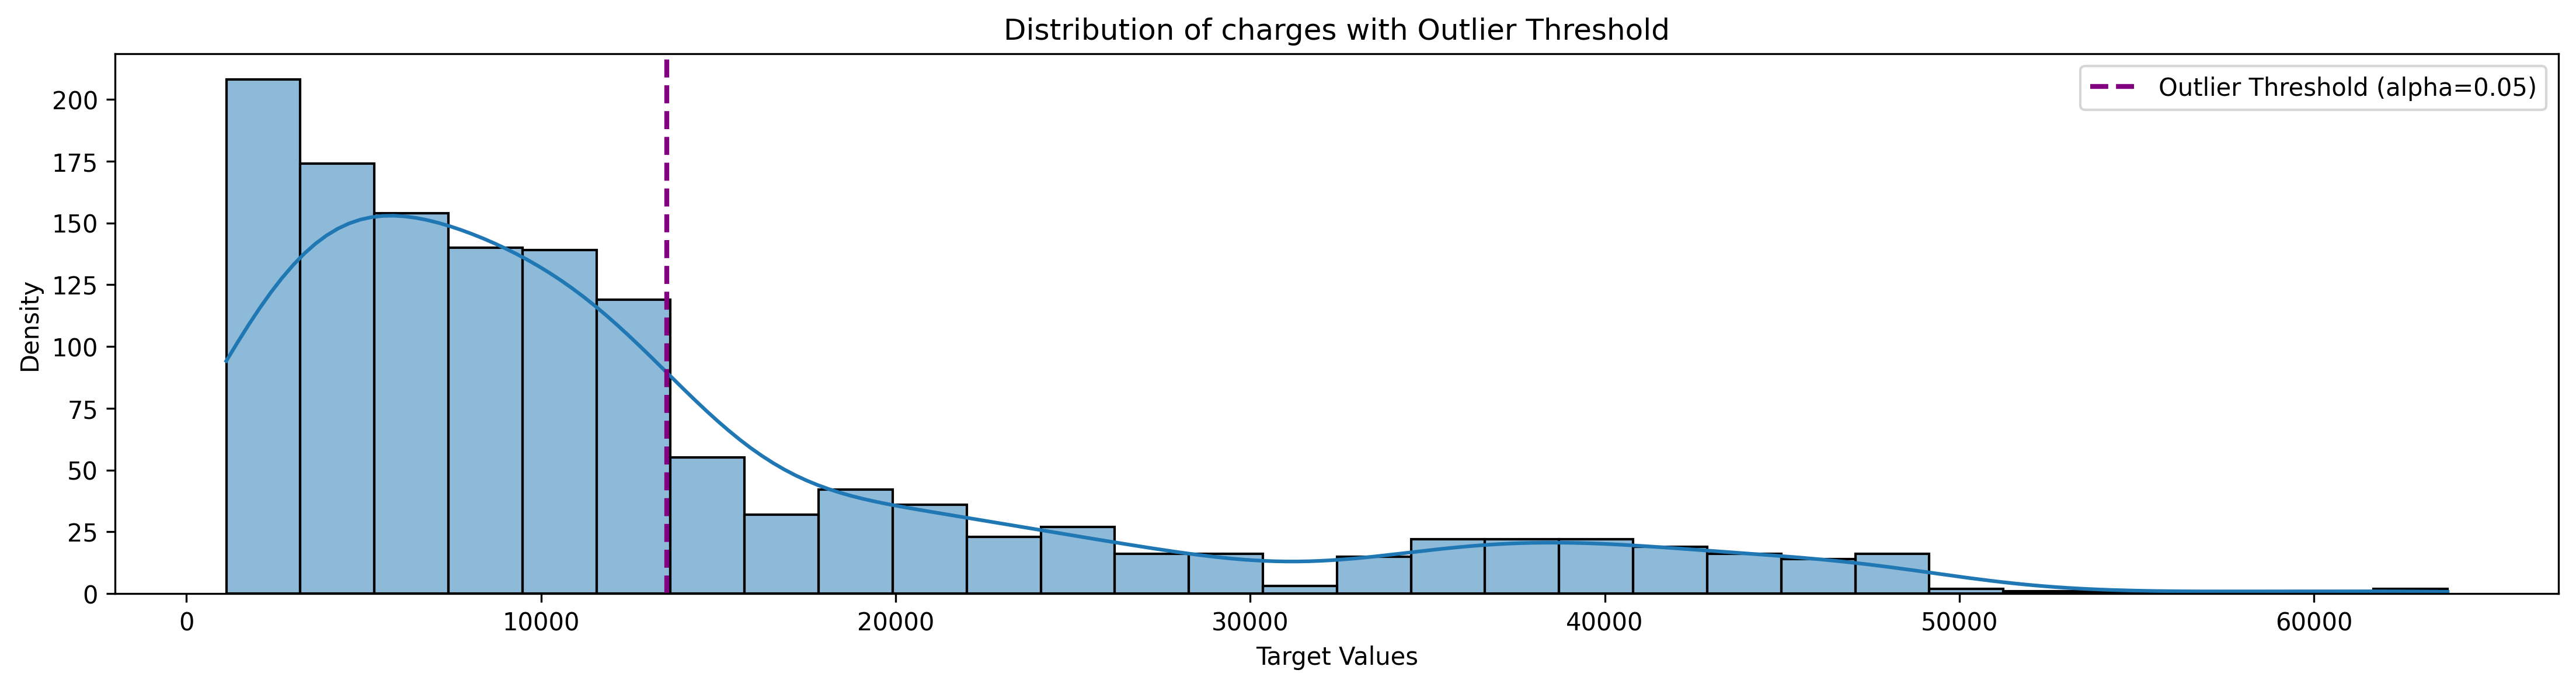

In [105]:
X_train, X_test, y_train = Preprocessing(df, test_df)

In [106]:
optimal_degree = final_results_df.loc[final_results_df['Validation MAPE'].idxmin()]['Degree']
optimal_alpha = final_results_df.loc[final_results_df['Validation MAPE'].idxmin()]['Best_Alpha']

poly = PolynomialFeatures(degree=optimal_degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

best_model = Ridge(alpha=optimal_alpha, random_state=42, max_iter=10000)
best_model.fit(X_train_poly, y_train)
y_pred = best_model.predict(X_test_poly).reshape(-1, 1)

In [107]:
submission = pd.DataFrame(y_pred, columns=['charges'])
submission.head()

,charges
0,24175.346824
1,9603.986399
2,10609.676400
3,11337.401465
4,15827.177362


In [108]:
submission.to_csv('submission.csv', index=False)

## Questions

1. Compare the weight distribution when applying L1/L2 regularization and their sparsity?




<span style="color:blue;">
Applying L1 (Lasso) and L2 (Ridge) regularization impacts weight distribution and sparsity in different ways:

### 1. **L1 Regularization (Lasso)**:
   - **Weight Distribution**: L1 regularization encourages weights to shrink towards zero. However, it promotes sparsity by setting some weights exactly to zero, effectively performing variable selection by keeping only the most influential features.
   - **Sparsity**: This method often results in sparse weight distributions, where many weights become exactly zero. The resulting model is more interpretable since only a subset of features remains with non-zero coefficients.

### 2. **L2 Regularization (Ridge)**:
   - **Weight Distribution**: L2 regularization penalizes large weights, but instead of setting them to zero, it reduces their magnitude. This effect distributes the penalty across all weights, making the distribution more dense and balanced.
   - **Sparsity**: L2 regularization does not create a sparse solution, as it doesn’t drive weights to zero. All features are retained, though with smaller weight values. This is often useful when all features are expected to contribute to the prediction but with varying influence.

**In summary**:
- **L1** creates a **sparser** model by zeroing out certain weights, often useful for feature selection.
- **L2** leads to a **dense** weight distribution by reducing all weights but keeping them non-zero, providing smoother and more generalized models without explicit feature selection.

</span>


2. How does the regularization parameter (alpha) affect each feature? Does it help to model's explainability?

<span style="color:blue;">
The regularization parameter, typically denoted as **alpha (α)**, has a significant effect on the magnitude of feature weights, ultimately influencing model complexity and interpretability:

### Effect of α on Each Feature
1. **L1 Regularization (Lasso)**:
   - **Feature Selection**: As α increases, the penalty on feature weights becomes stronger. For L1 regularization, this results in driving some feature weights to zero. Higher α values lead to a more sparse model where only the most influential features remain, helping identify key variables.
   - **Sparsity**: A large α in L1 regularization pushes more weights to zero, reducing the number of features. Conversely, a smaller α retains more features, balancing between overfitting and underfitting.

2. **L2 Regularization (Ridge)**:
   - **Weight Shrinking**: For L2 regularization, an increased α penalizes large weights but does not set them to zero. Instead, it uniformly shrinks all feature weights, reducing their magnitude but keeping all features involved. Higher α leads to smaller, more balanced weights across features.
   - **Feature Retention**: L2 regularization does not remove features but lessens the weight of each, especially for less impactful features, which can reduce overfitting while maintaining all predictors.

### Impact on Model Explainability
- **L1 Regularization**: By driving some weights to zero, L1 regularization enhances explainability by selecting a subset of important features. This sparsity allows for a more interpretable model by focusing on the most significant predictors, making it easier to understand which features impact the outcome.
  
- **L2 Regularization**: Although it doesn’t lead to feature selection, L2 regularization makes the model more stable and reduces the variance by balancing weights across features. This stability improves the generalizability and robustness of the model but may make direct interpretation of individual features more challenging, as no clear subset of features stands out.

**In summary**:
- **Higher α in L1** can improve explainability by isolating key features.
- **Higher α in L2** stabilizes the model but doesn’t enhance interpretability directly, as it keeps all features involved.
</span>

3. How does the regularization affect dimension expansion?

<span style="color:blue;">
egularization interacts with dimension expansion (often seen in polynomial regression or other basis expansions) by controlling the influence of high-dimensional features:

### 1. **Effect of Regularization on Dimension Expansion**:
   - When expanding features to higher dimensions, such as adding polynomial terms or interaction terms, the model can become highly flexible but also prone to **overfitting**. Regularization helps prevent this by penalizing larger weights, which in turn controls the complexity of the expanded feature space.
   - In high-dimensional spaces, regularization reduces the risk of overfitting by shrinking or eliminating some weights, making the model generalize better despite the increased dimensionality.

### 2. **L1 Regularization (Lasso)**:
   - **Feature Selection**: L1 regularization often performs automatic feature selection, especially in high-dimensional settings, by setting many weights to zero. This results in a sparse model where only the most impactful features in the expanded space are kept, effectively simplifying the model and reducing the risk of overfitting.
   - **Dimension Reduction**: With L1, the expanded dimensional space is reduced in terms of active features, allowing the model to retain important interactions or polynomial terms while ignoring less relevant ones.

### 3. **L2 Regularization (Ridge)**:
   - **Weight Shrinkage**: L2 regularization does not reduce the number of features by setting coefficients to zero but instead shrinks all feature weights. This approach is useful in expanded feature spaces, as it ensures all dimensions contribute without excessive influence from any one feature.
   - **Balancing Complexity**: In high-dimensional settings, L2 regularization prevents any particular dimension from dominating the model, which is essential for handling multicollinearity or redundancy in the expanded features.

### 4. **Elastic Net (Combination of L1 and L2)**:
   - **Balanced Approach**: Elastic Net combines the strengths of L1 and L2 regularization. It balances dimension reduction with weight shrinkage, making it particularly effective for high-dimensional spaces, as it can both eliminate irrelevant features and shrink the remaining ones.

**In summary**:
- **L1** helps with dimension expansion by selectively eliminating unnecessary features, improving interpretability in high-dimensional spaces.
- **L2** regularizes the influence of all expanded features, ensuring balanced contributions without eliminating them.
- **Elastic Net** provides a balanced option, controlling complexity by both selecting and shrinking features in expanded dimensions.

</span>